In [1]:
import numpy as np
from skimage import measure
from skimage.segmentation import find_boundaries
from skimage.morphology import opening,closing
from skimage.io import imread
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
from os import listdir
import pandas as pd
from scipy.stats import kde
import seaborn as sns
import copy
from math import exp,log
import pickle
import scipy.ndimage as ndimage
import scipy.interpolate.fitpack as fitpack
from sklearn import manifold,decomposition,random_projection,cluster,metrics,preprocessing,mixture,model_selection
from sklearn.neighbors import kneighbors_graph,BallTree
from hmmlearn import hmm
# from pymc import MCMC,flib,Model,MAP
# from ripser import Rips,ripser,plot_dgms
# from persim import PersImage
import scipy.io as sio
# import kmapper as km
# from kmapper import jupyter
from mpl_toolkits.mplot3d import Axes3D
from cell_class import single_cell,fluor_single_cell
import contour_class
import utility_tools
import image_warp
from contour_tool import df_find_contour_points,find_contour_points,generate_contours,align_contour_to,align_contours
from scipy.signal import medfilt,wiener
from traj_class import single_cell_traj,fluor_single_cell_traj
# import bnpy
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,QuantileTransformer
from itertools import product
from sklearn.cluster import DBSCAN,KMeans,MeanShift,SpectralClustering,AgglomerativeClustering
from sklearn.metrics import silhouette_score#,davies_bouldin_score
import glob
from pykalman import KalmanFilter
# from neupy import algorithms, utils
from tslearn.utils import to_time_series,to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,KShape,GlobalAlignmentKernelKMeans,silhouette_score
from tslearn.metrics import dtw_path,dtw_subsequence_path,cdist_gak,cdist_dtw
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter
from sklearn.manifold import MDS
import sparse
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import signal
from statsmodels import robust
from traj_scale import sp_traj_scaling,ssp_traj_scaling
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
import matplotlib.patches as mpatches
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from scipy.stats.mstats import mquantiles

C:\Users\zoro\Anaconda3\envs\myconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
main_path='/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/'
   

result_path=main_path+'result/'
    
sct_path=main_path+'single_cell_traj/'
#sct_list=sorted(listdir(sct_path))
sct_list=sorted(glob.glob(sct_path+'*long_traj'))
print(len(sct_list))

0


In [80]:
key_list=['Cell_AreaShape_Area', 'Cell_AreaShape_Center_X', 'Cell_AreaShape_Center_Y', 'Cell_AreaShape_Center_Z', \
          'Cell_AreaShape_Compactness', 'Cell_AreaShape_Eccentricity', 'Cell_AreaShape_EulerNumber', \
          'Cell_AreaShape_Extent', 'Cell_AreaShape_FormFactor', 'Cell_AreaShape_MajorAxisLength',\
          'Cell_AreaShape_MaxFeretDiameter', 'Cell_AreaShape_MaximumRadius', 'Cell_AreaShape_MeanRadius', \
          'Cell_AreaShape_MedianRadius', 'Cell_AreaShape_MinFeretDiameter', 'Cell_AreaShape_MinorAxisLength', \
          'Cell_AreaShape_Orientation', 'Cell_AreaShape_Perimeter', 'Cell_AreaShape_Solidity']
key_mask=np.ones((len(key_list),),dtype=bool)
key_mask[key_list.index('Cell_AreaShape_Center_Y')]=False
key_mask[key_list.index('Cell_AreaShape_Center_X')]=False
key_mask[key_list.index('Cell_AreaShape_Center_Z')]=False
key_mask[key_list.index('Cell_AreaShape_EulerNumber')]=False
key_mask[key_list.index('Cell_AreaShape_Orientation')]=False
print(key_list.index('Cell_AreaShape_Center_X'),key_list.index('Cell_AreaShape_Center_Y'),key_list.index('Cell_AreaShape_Center_Z'),key_list.index('Cell_AreaShape_EulerNumber'))
print(key_list.index('Cell_AreaShape_MeanRadius'))

(1, 2, 3, 6)
12


/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_11_long_traj
0.31788414968468803
(22, array([ 3, 49]))


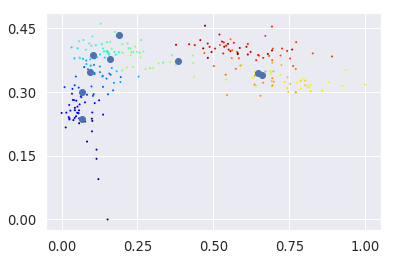

(3, 49)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_12_long_traj
0.5690123373141391
(31, array([28, 36]))


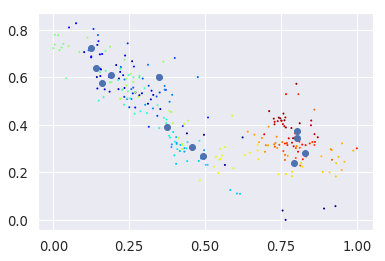

(25, 37)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_13_long_traj
0.3655521308163832
(11, array([ 9, 16]))


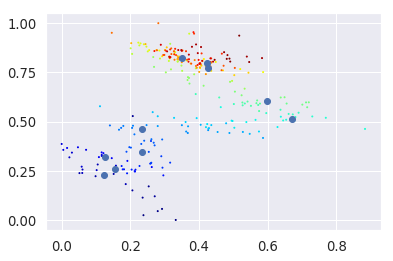

(5, 17)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_15_long_traj
0.36214992604318064
(25, array([ 8, 28]))


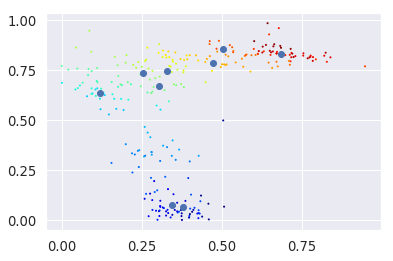

(8, 28)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_17_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_19_long_traj
0.4135800689009044
(16, array([ 8, 19]))


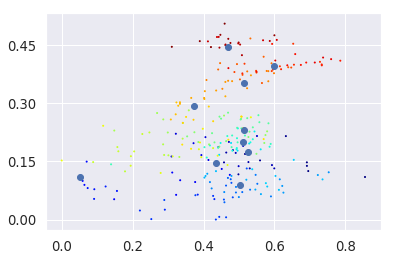

(8, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_20_long_traj
0.5273536682770498
(14, array([11, 20]))


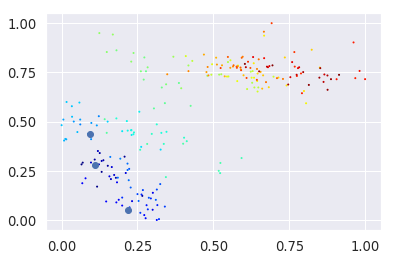

(8, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_25_long_traj
0.6123763586076317
(14, array([ 7, 16]))


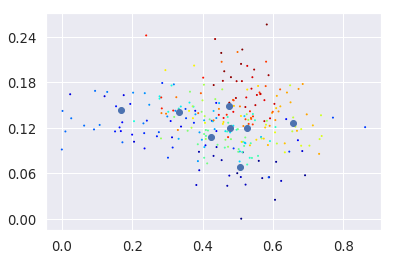

(7, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_2_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy10_7_long_traj
0.2846779470922918
(15, array([ 9, 18]))


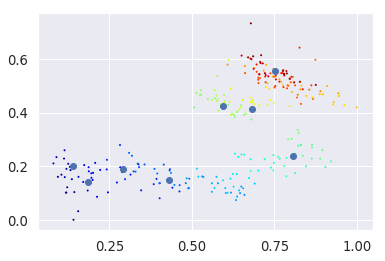

(9, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_11_long_traj
0.34663657024446315
(15, array([11, 21]))


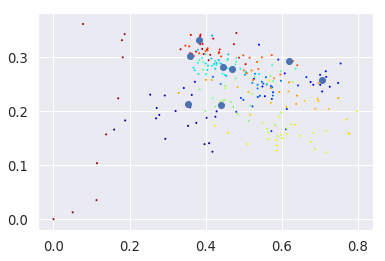

(9, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_12_long_traj
0.4199533977935865
(34, array([29, 37]))


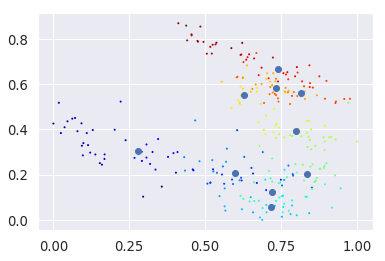

(28, 40)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_13_long_traj
0.38702743337467543
(18, array([13, 23]))


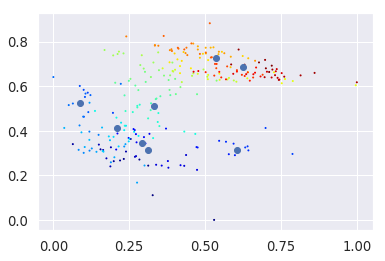

(12, 24)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_15_long_traj
0.37647590074936166
(20, array([19, 26]))


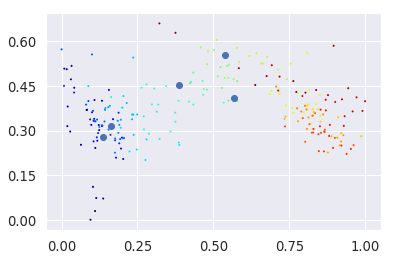

(14, 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_1_long_traj
0.321092250611584


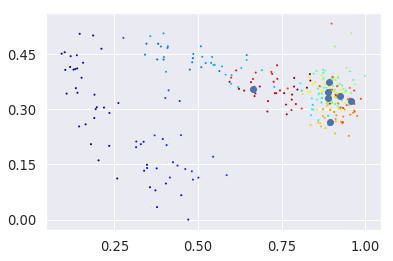

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_25_long_traj
0.3624287640214566
(15, array([13, 20]))


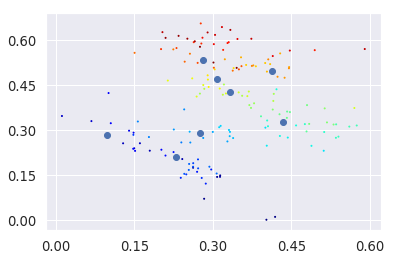

(9, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_35_long_traj
0.21153199543675283
(13, array([ 6, 22]))


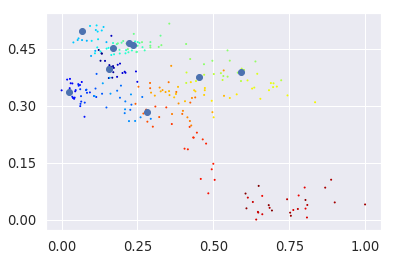

(6, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy11_9_long_traj
0.3932063750464176
(20, array([17, 25]))


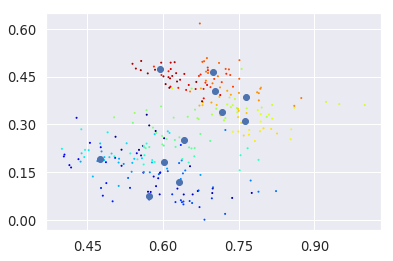

(14, 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy12_11_long_traj
0.36942749650710843
(11, array([ 0, 13]))


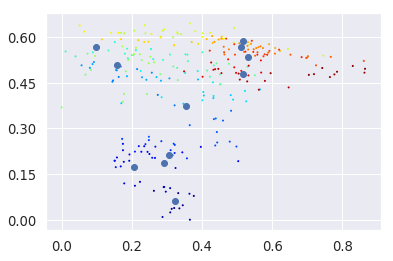

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy12_17_long_traj
0.33429166336957145
(0, array([ 0, 16]))


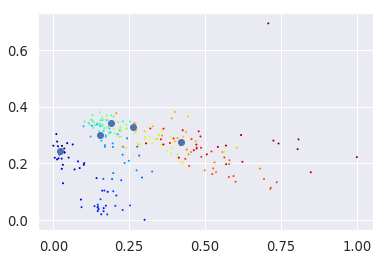

(0, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy12_20_long_traj
0.47350175319154436
(15, array([ 2, 29]))


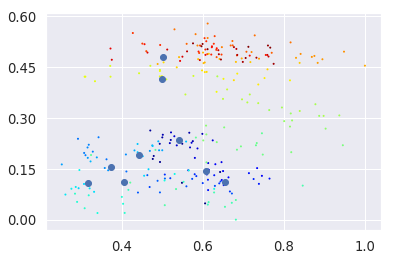

(2, 29)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy12_5_long_traj
0.26146993783514016


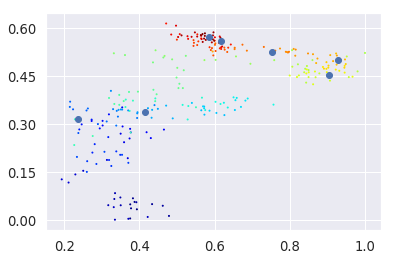

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_13_long_traj
0.4793392567122038
(18, array([ 6, 47]))


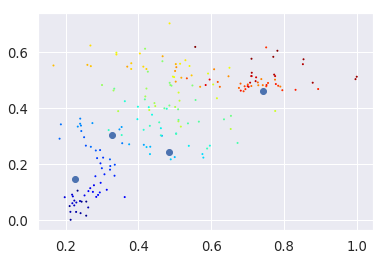

(6, 47)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_15_long_traj
0.4209414691297307
(19, array([ 5, 25]))


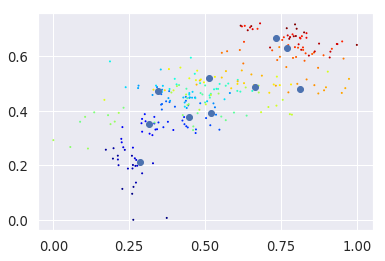

(5, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_19_long_traj
0.47984557544720124
(19, array([18, 25]))


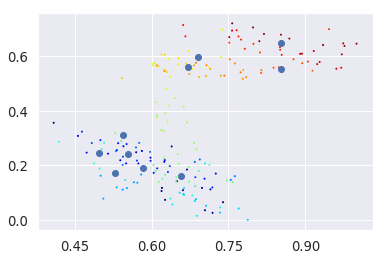

(13, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_20_long_traj
0.4020904102199445
(28, array([19, 30]))


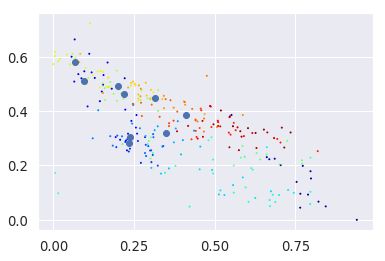

(19, 34)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_21_long_traj
0.39017333256858794
(4, array([ 0, 14]))


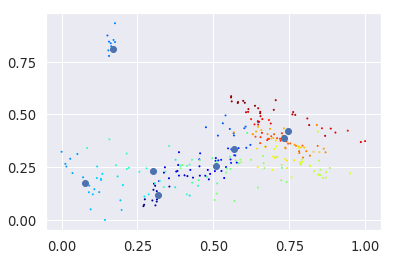

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_24_long_traj
0.29259686460053086
(8, array([ 5, 12]))


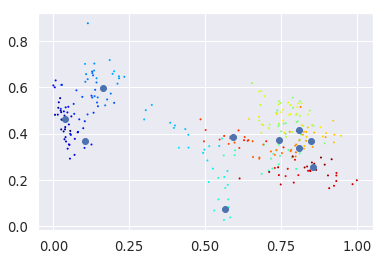

(2, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_28_long_traj
0.4443926958230858
(27, array([24, 34]))


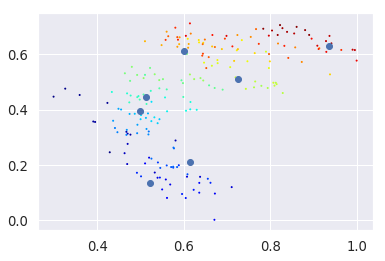

(21, 34)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_30_long_traj
0.34859104103607813
(12, array([ 9, 20]))


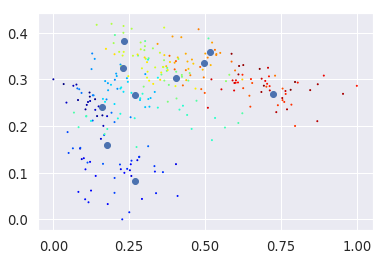

(6, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_38_long_traj
0.27214374692900295
(14, array([ 8, 18]))


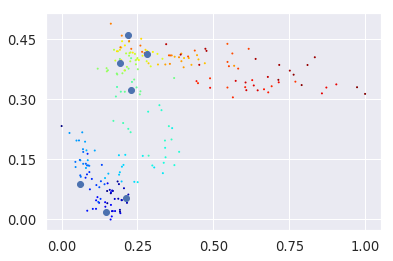

(8, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_3_long_traj
0.3236386393651555
(7, array([0, 9]))


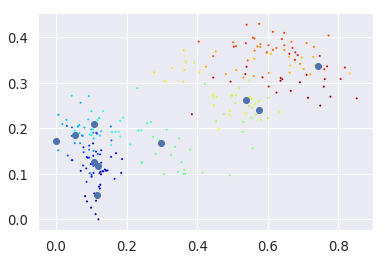

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_46_long_traj
0.3502419489871218
(1, array([0, 8]))


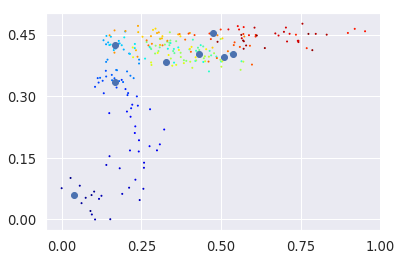

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_5_long_traj
0.33561013422972635
(7, array([ 2, 26]))


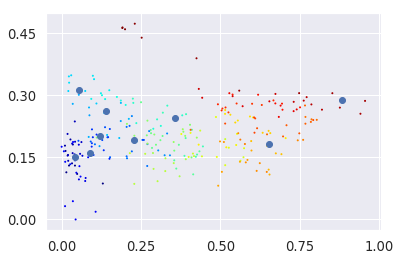

(2, 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy13_6_long_traj
0.28327927112584134
(2, array([ 0, 35]))


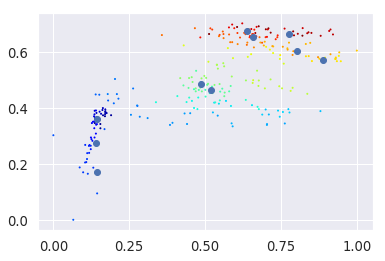

(0, 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_12_long_traj
0.2841489319799934
(6, array([ 3, 18]))


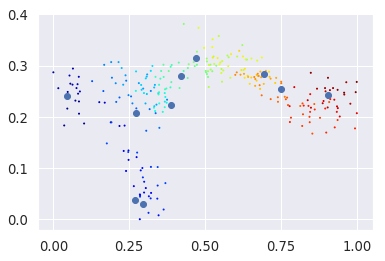

(3, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_13_long_traj
0.39256169673314206
(13, array([12, 21]))


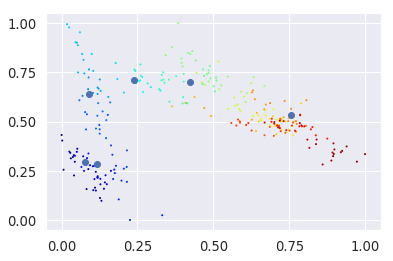

(7, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_14_long_traj
0.26930198160836666
(11, array([ 8, 24]))


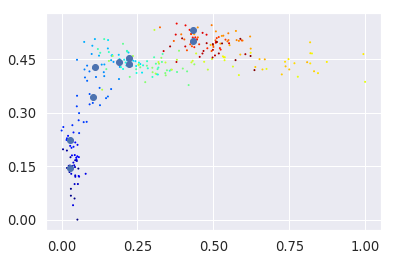

(8, 24)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_17_long_traj
0.3773317566357029
(0, array([ 0, 13]))


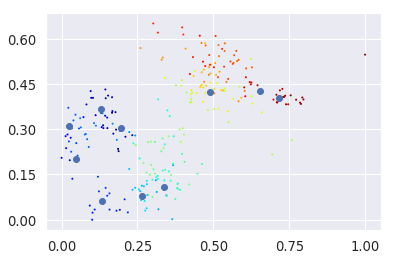

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_22_long_traj
0.44329416947125055
(9, array([ 5, 16]))


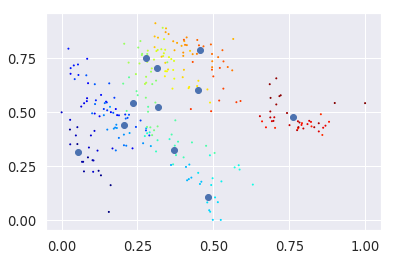

(3, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_24_long_traj
0.26121141853809815
(3, array([ 0, 14]))


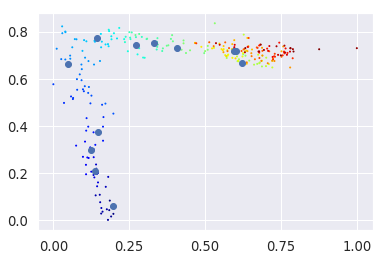

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_25_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_3_long_traj
0.4249959863735435
(0, array([ 0, 34]))


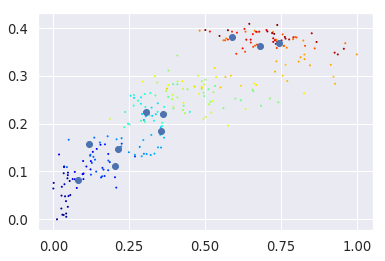

(0, 34)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_7_long_traj
0.3285836114077396
(1, array([0, 7]))


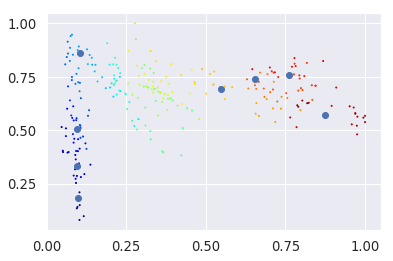

(0, 7)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy14_9_long_traj
0.2481513104775251
(1, array([0, 8]))


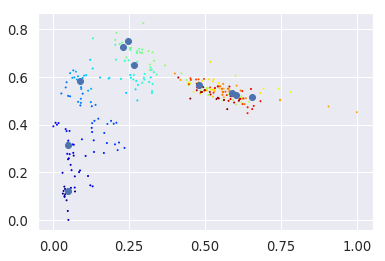

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_10_long_traj
0.27131962314303454
(24, array([17, 24]))


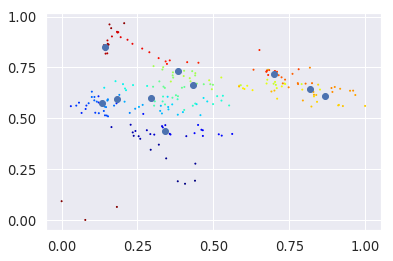

(17, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_11_long_traj
0.37954968801484207
(7, array([ 0, 10]))


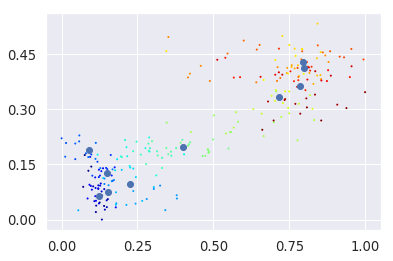

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_13_long_traj
0.29260877117632894
(3, array([ 2, 12]))


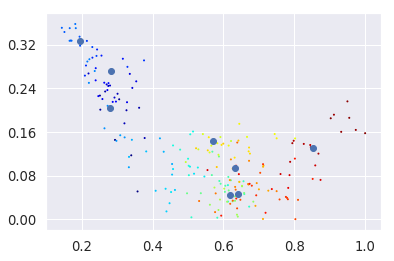

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_21_long_traj
0.3682585983248629
(13, array([ 7, 30]))


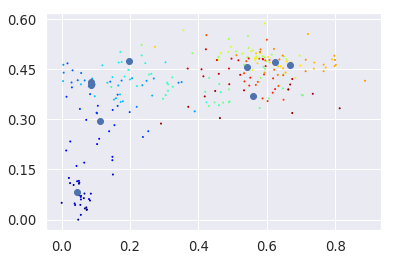

(7, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_22_long_traj
0.3273325800753276
(18, array([13, 22]))


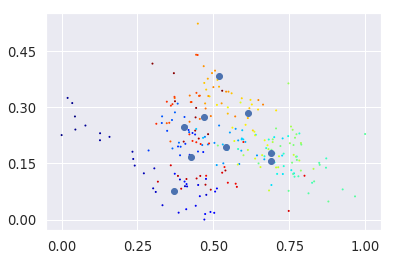

(12, 24)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_2_long_traj
0.3783124030085894
(3, array([0, 8]))


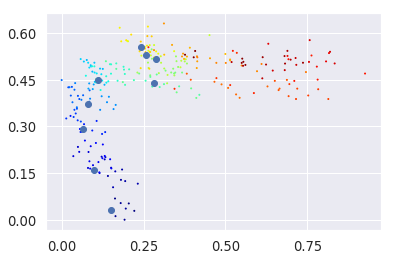

(0, 9)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_5_long_traj
0.458663444053867
(8, array([0, 8]))


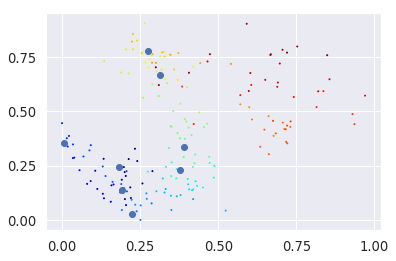

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_6_long_traj
0.36077566705450465
(8, array([ 7, 18]))


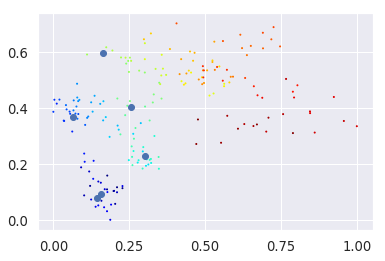

(2, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_7_long_traj
0.3753311961170537
(12, array([ 6, 15]))


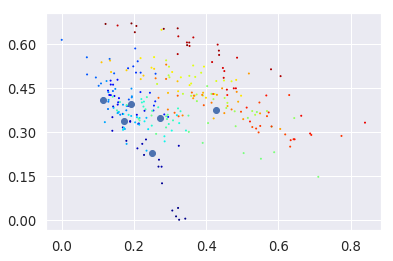

(6, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy15_9_long_traj
0.28512571871178605
(5, array([ 0, 21]))


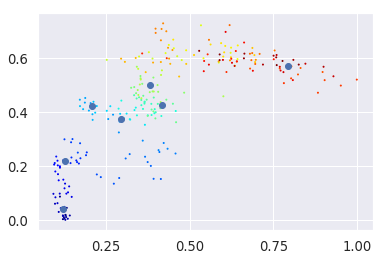

(0, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy16_10_long_traj
0.43897035272682433
(8, array([ 8, 18]))


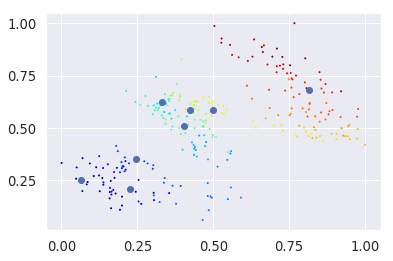

(2, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy16_11_long_traj
0.48545692845499855
(26, array([22, 32]))


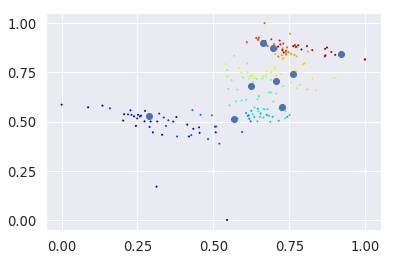

(20, 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy16_22_long_traj
0.2985409914377548
(39, array([31, 43]))


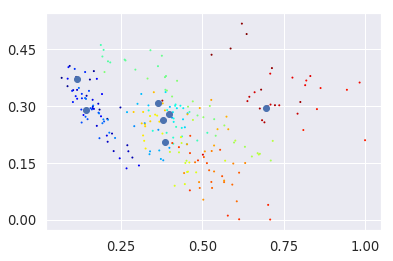

(31, 43)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy16_3_long_traj
0.41722472933104765
(10, array([ 8, 19]))


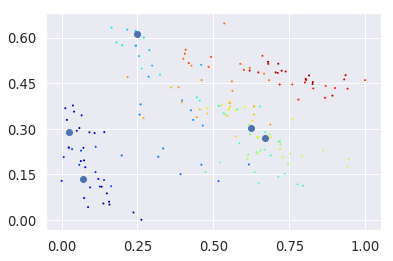

(4, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy16_4_long_traj
0.2312207840782462
(2, array([ 0, 10]))


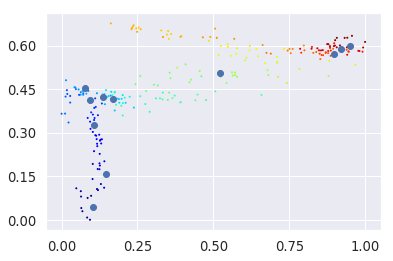

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_12_long_traj
0.36768002021974466
(23, array([11, 27]))


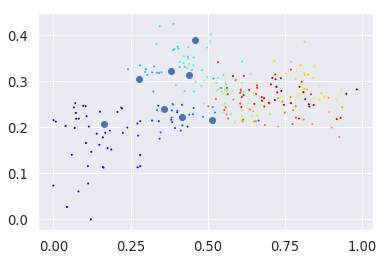

(11, 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_14_long_traj
0.37604713068196627
(13, array([ 0, 22]))


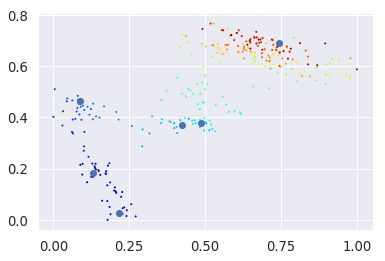

(0, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_15_long_traj
0.2782185838649868
(9, array([ 4, 11]))


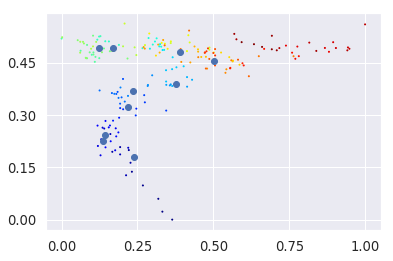

(3, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_17_long_traj
0.38940742644296855
(2, array([ 0, 30]))


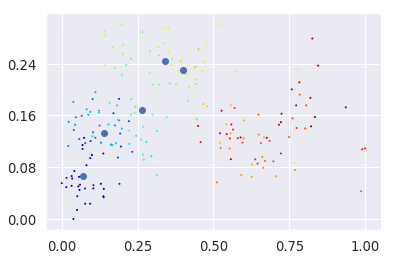

(0, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_18_long_traj
0.4336674389236746
(21, array([14, 32]))


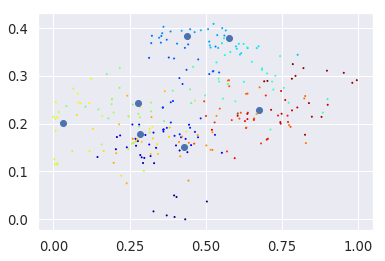

(14, 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_19_long_traj
0.42345635644956475
(11, array([ 0, 66]))


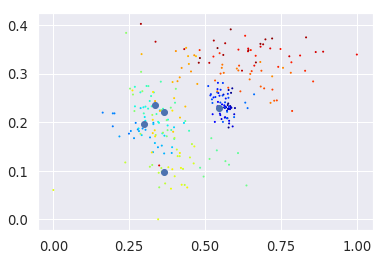

(0, 66)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_24_long_traj
0.2742982384821917
(13, array([ 8, 49]))


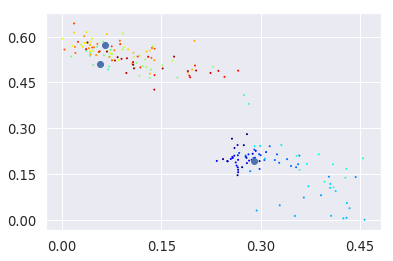

(8, 49)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_25_long_traj
0.37336898911960514
(5, array([ 0, 14]))


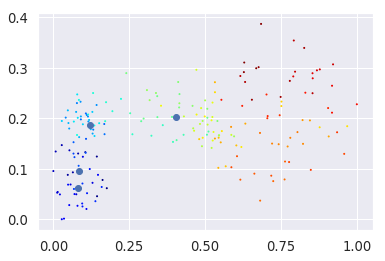

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_3_long_traj
0.3345755270733309
(4, array([0, 7]))


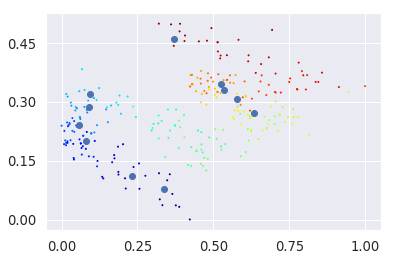

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_4_long_traj
0.3561748551691044
(7, array([ 0, 23]))


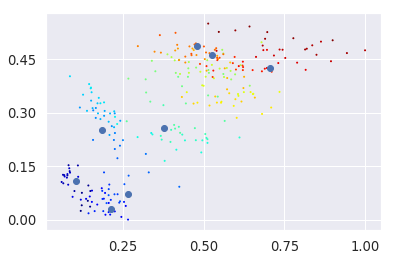

(0, 23)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy17_8_long_traj
0.35923644317998193
(6, array([ 3, 23]))


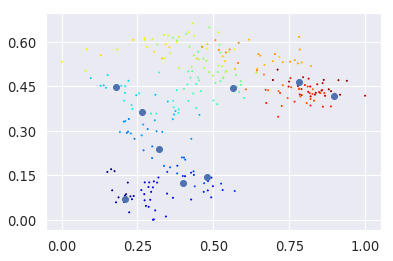

(3, 23)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy18_10_long_traj
0.41499526168311884
(30, array([29, 37]))


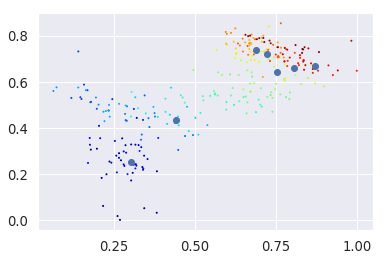

(24, 37)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy18_13_long_traj
0.3754416304836237
(13, array([ 7, 14]))


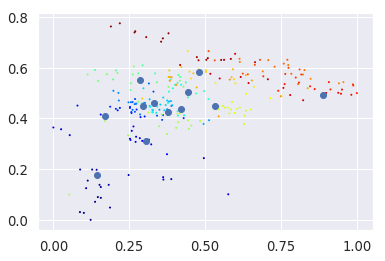

(7, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy18_4_long_traj
0.4263385116716393
(2, array([0, 9]))


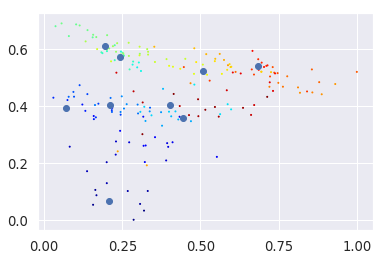

(0, 9)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy18_9_long_traj
0.3400315265102513
(9, array([ 5, 16]))


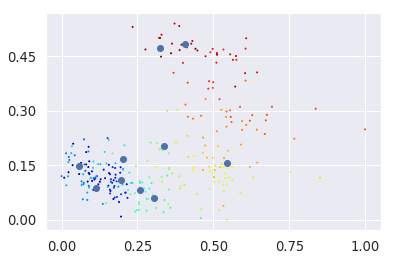

(3, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_10_long_traj
0.3099549226313234
(9, array([ 7, 21]))


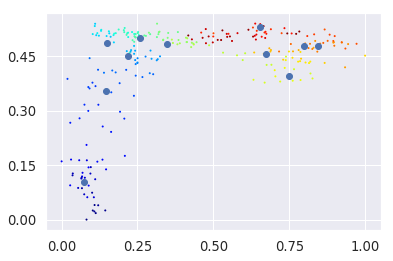

(7, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_13_long_traj
0.25153954262238276
(1, array([0, 9]))


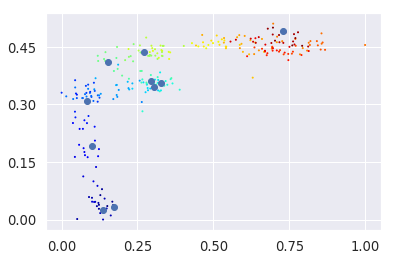

(0, 9)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_14_long_traj
0.3423262643051317
(6, array([ 0, 35]))


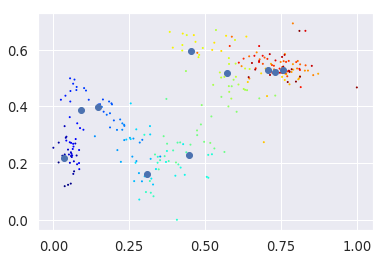

(0, 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_16_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_17_long_traj
0.29377771981287254
(37, array([34, 43]))


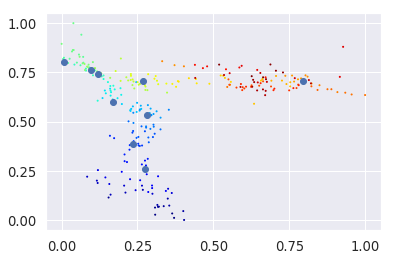

(31, 43)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_18_long_traj
0.29931667604510165
(18, array([12, 27]))


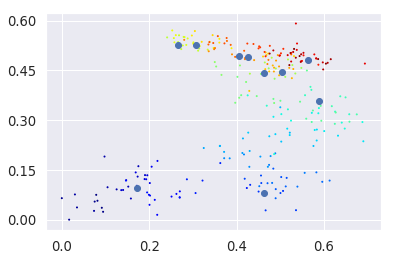

(12, 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_20_long_traj
0.4049493369862946
(7, array([ 3, 14]))


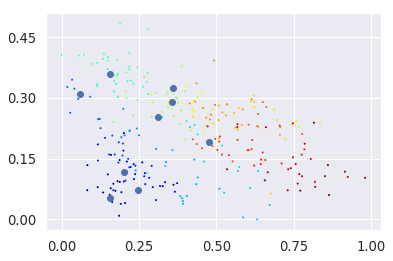

(1, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_23_long_traj
0.2927063167751482
(13, array([ 6, 18]))


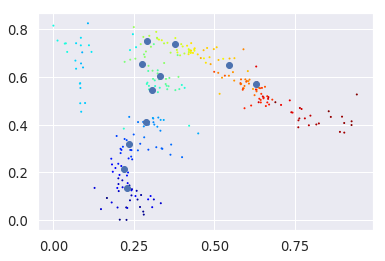

(6, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_24_long_traj
0.21907627250793227


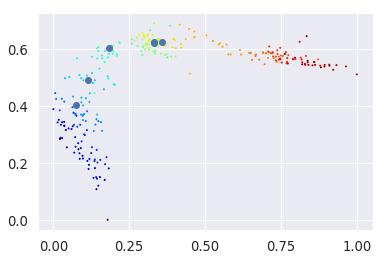

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_2_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_42_long_traj
0.3032959002563713
(47, array([42, 54]))


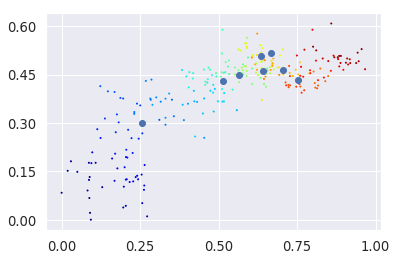

(42, 54)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_6_long_traj
0.6306558146397188
(4, array([ 2, 11]))


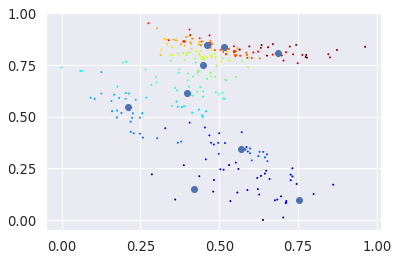

(0, 11)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_7_long_traj
0.2727458318350757
(5, array([ 3, 11]))


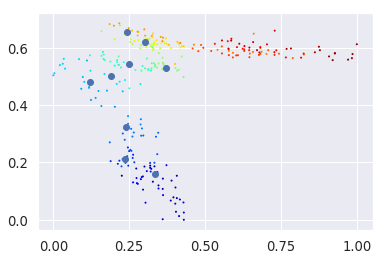

(0, 11)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy19_9_long_traj
0.32839711589710346
(22, array([13, 29]))


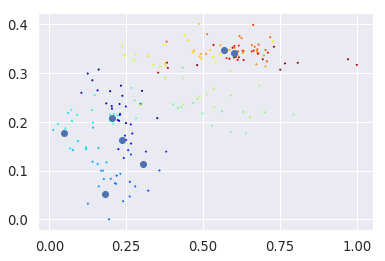

(13, 29)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy1_11_long_traj
0.4730506103117864
(34, array([27, 35]))


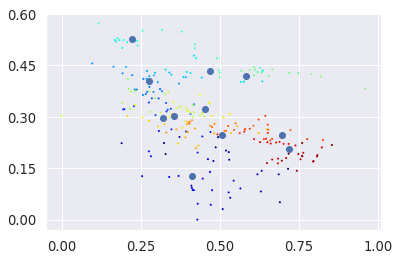

(27, 40)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy1_1_long_traj
0.2945158826204298
(1, array([ 0, 14]))


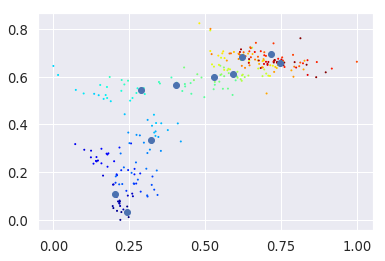

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy1_2_long_traj
0.3100529371818239
(15, array([ 0, 27]))


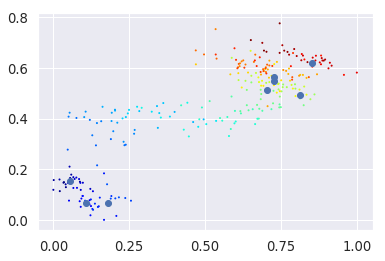

(0, 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy1_5_long_traj
0.34892953545637706
(24, array([18, 27]))


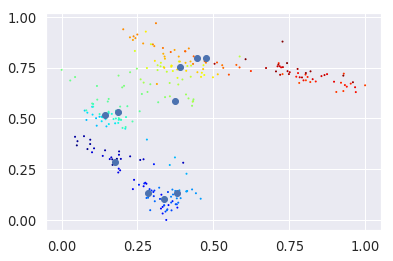

(18, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_14_long_traj
0.3065204353902262
(2, array([0, 8]))


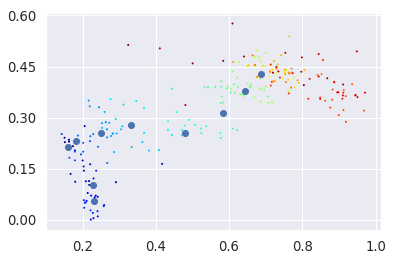

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_15_long_traj
0.436707031852774
(13, array([ 7, 17]))


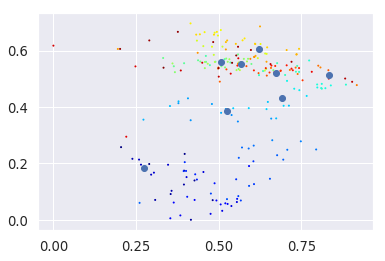

(7, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_16_long_traj
0.32470488436920636
(0, array([ 0, 21]))


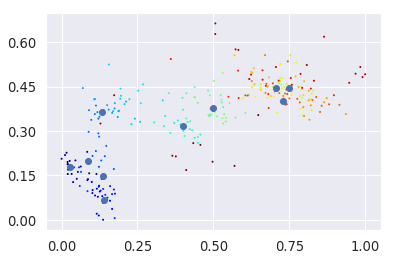

(0, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_18_long_traj
0.388372081658569
(0, array([0, 9]))


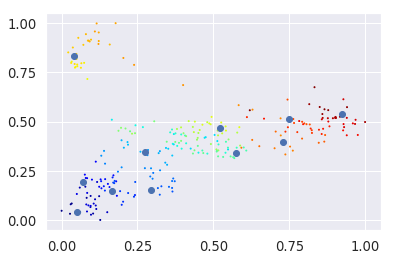

(0, 9)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_1_long_traj
0.4111970707119571
(9, array([ 0, 29]))


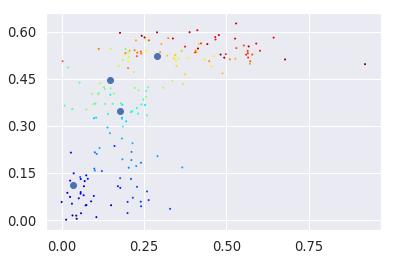

(0, 29)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_23_long_traj
0.3375143530709562
(8, array([ 6, 13]))


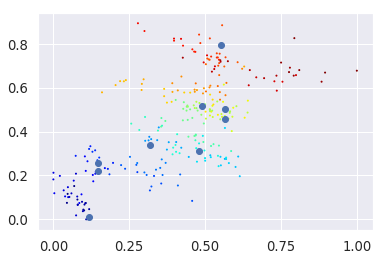

(2, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_25_long_traj
0.3374243873425911
(3, array([0, 8]))


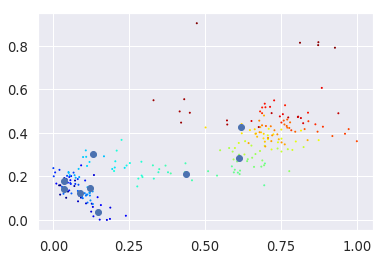

(0, 9)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_28_long_traj
0.3369829644513567
(5, array([ 0, 15]))


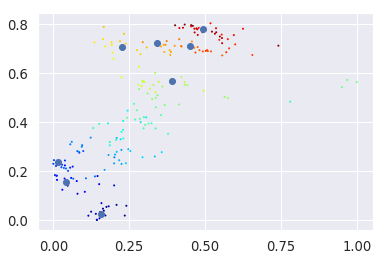

(0, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_30_long_traj
0.4252369894077157
(35, array([34, 48]))


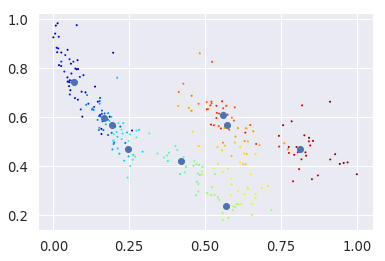

(34, 48)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy20_32_long_traj
0.5672039305153079
(7, array([ 0, 18]))


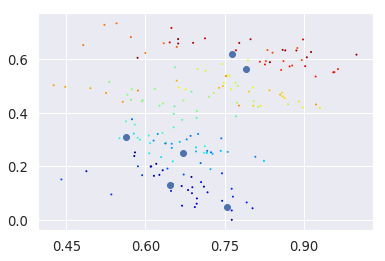

(0, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_10_long_traj
0.42137885475013737
(12, array([ 4, 22]))


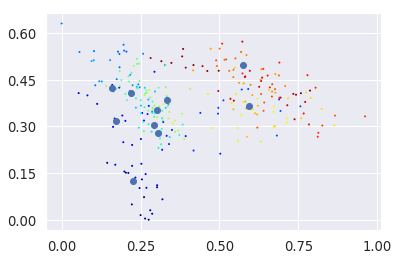

(4, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_11_long_traj
0.28116676704737625


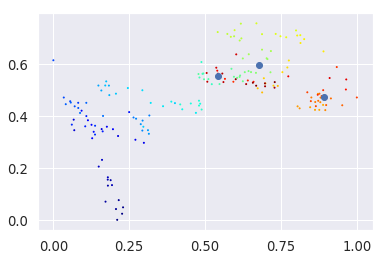

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_12_long_traj
0.2509182307655934


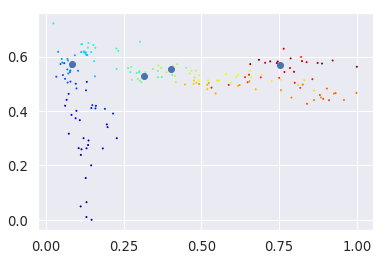

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_19_long_traj
0.4756963177949803
(13, array([ 7, 17]))


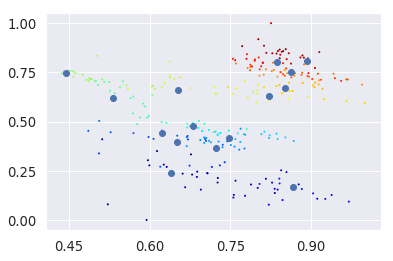

(7, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_20_long_traj
0.3370052656788487
(8, array([ 0, 12]))


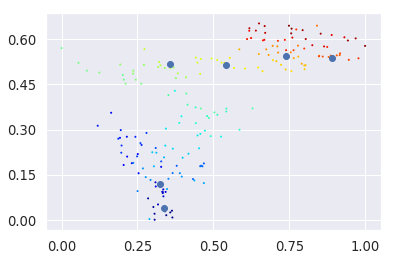

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy2_9_long_traj
0.4364530448101438


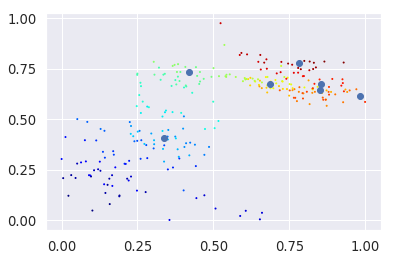

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_12_long_traj
0.5589891538944728
(30, array([23, 33]))


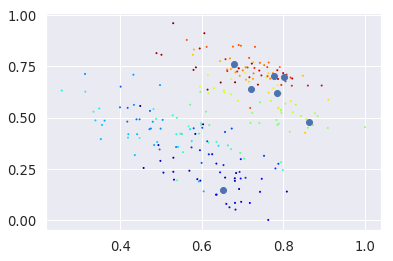

(23, 36)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_13_long_traj
0.6217833437327552
(28, array([27, 34]))


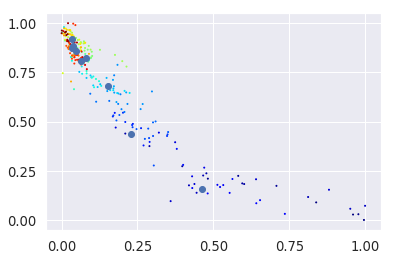

(22, 34)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_16_long_traj
0.32207489103125997
(21, array([ 0, 44]))


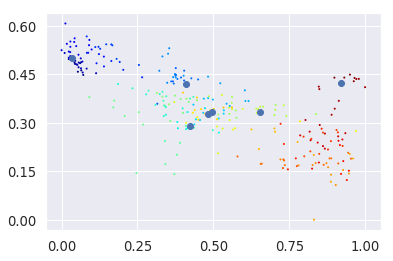

(0, 44)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_17_long_traj
0.4017361470021945
(8, array([ 0, 11]))


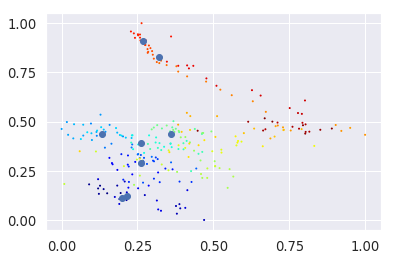

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_19_long_traj
0.30509344633589675
(5, array([ 4, 13]))


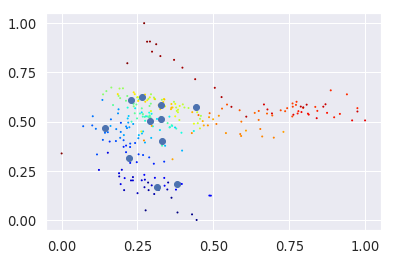

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_1_long_traj
0.3018335519079191
(1, array([ 0, 12]))


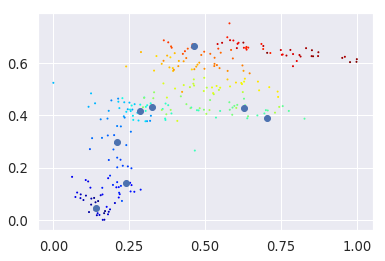

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_22_long_traj
0.3410346276696825


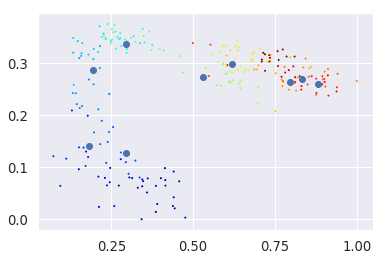

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_27_long_traj
0.31242242853283275
(12, array([ 6, 13]))


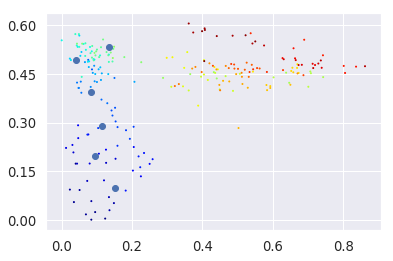

(6, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_29_long_traj
0.45502287684317744
(13, array([ 6, 15]))


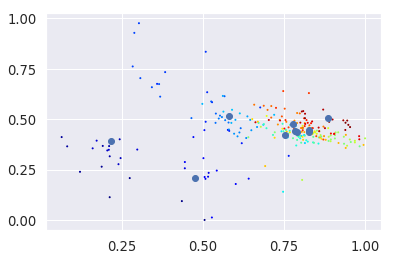

(6, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_2_long_traj
0.373869159572054
(24, array([21, 31]))


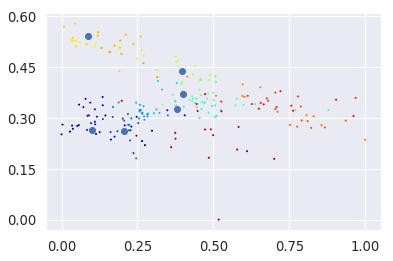

(18, 31)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_4_long_traj
0.30799865051387715
(13, array([ 3, 20]))


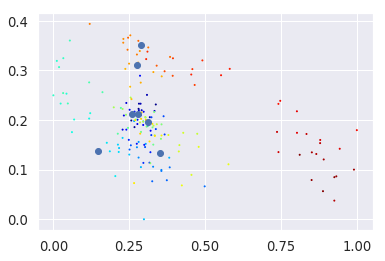

(3, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_5_long_traj
0.38367933828564094
(13, array([ 4, 14]))


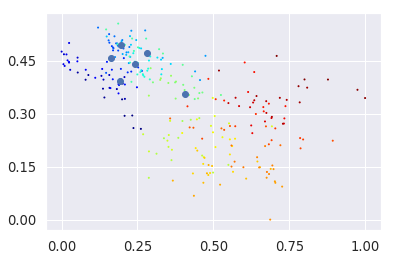

(4, 19)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_6_long_traj
0.5985096606570358
(26, array([26, 39]))


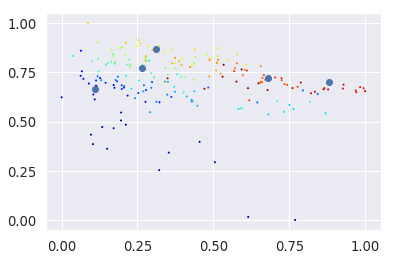

(26, 39)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_7_long_traj
0.271055135020709
(8, array([ 0, 11]))


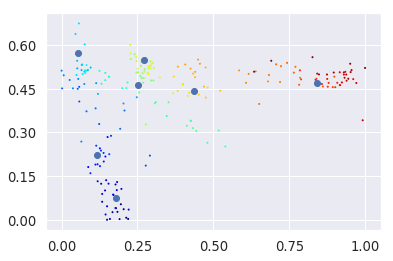

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_8_long_traj
0.30111204106901335
(14, array([ 7, 15]))


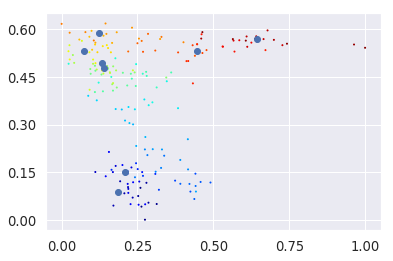

(7, 20)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy3_9_long_traj
0.40801372065782415
(6, array([ 2, 13]))


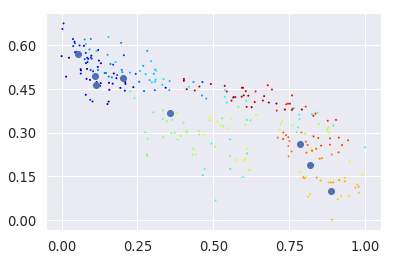

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_11_long_traj
0.26775312730736467
(22, array([17, 24]))


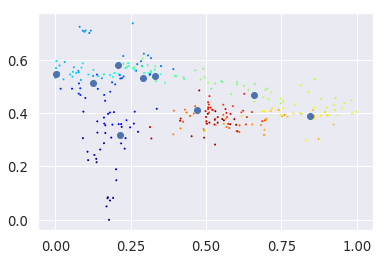

(16, 28)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_15_long_traj
0.3471456466421256
(1, array([ 0, 14]))


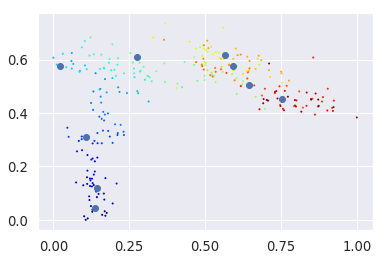

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_25_long_traj
0.33055777953708826
(2, array([ 0, 14]))


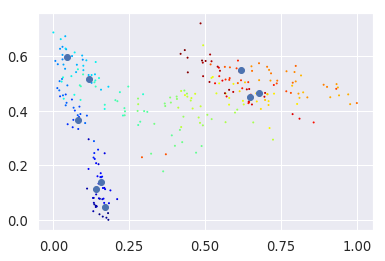

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_4_long_traj
0.32594378259714196
(5, array([ 0, 14]))


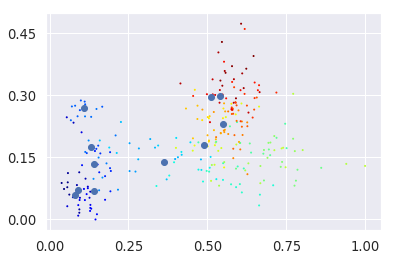

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_5_long_traj
0.37437597851084564
(7, array([2, 9]))


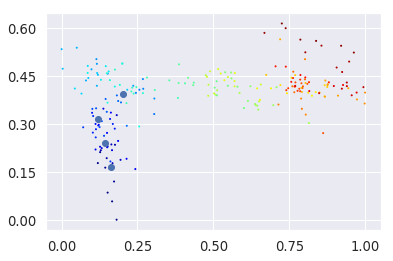

(1, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_7_long_traj
0.3179458999003942
(2, array([ 0, 10]))


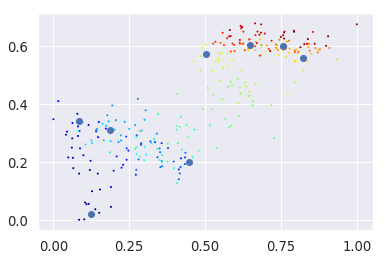

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy4_8_long_traj
0.22955441836234644
(44, array([42, 54]))


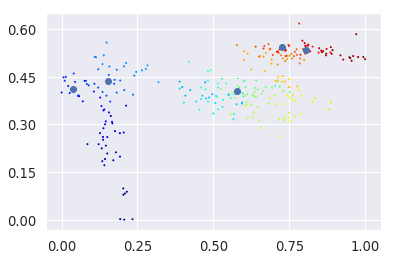

(42, 54)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy5_14_long_traj
0.3353690899522167
(0, array([0, 8]))


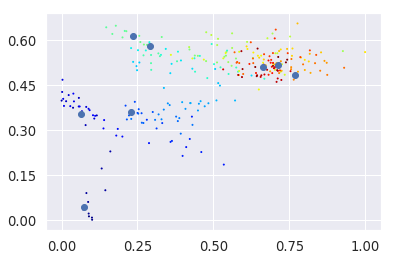

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy5_1_long_traj
0.4747706180892113
(37, array([22, 44]))


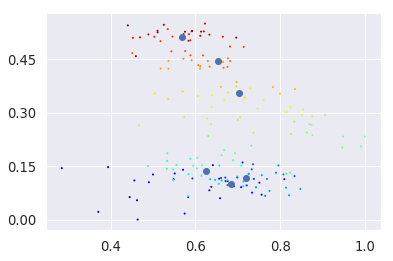

(22, 44)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy5_5_long_traj
0.2606220193923213
(47, array([39, 49]))


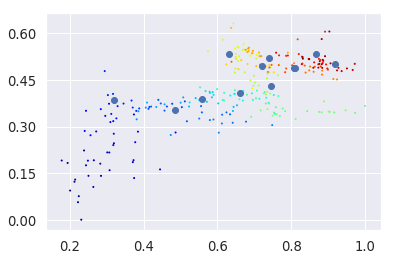

(39, 53)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_11_long_traj
0.3351443437049721
(19, array([ 0, 23]))


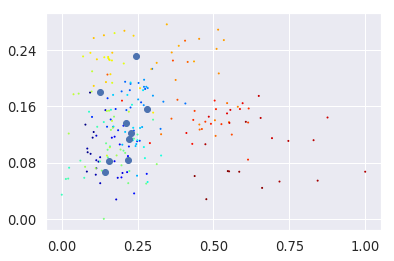

(0, 23)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_12_long_traj
0.2481231465230343
(20, array([15, 30]))


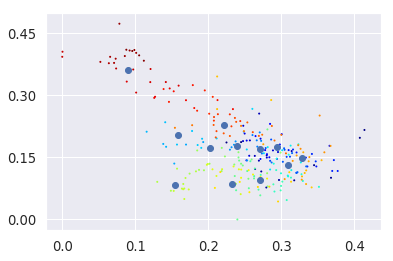

(15, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_15_long_traj
0.37500582832036783
(17, array([15, 32]))


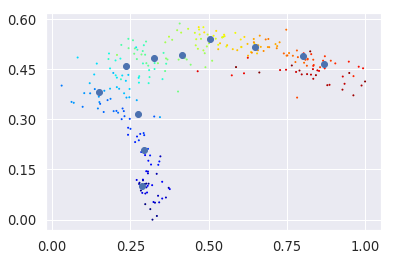

(15, 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_17_long_traj
0.3309070492064811
(8, array([ 0, 13]))


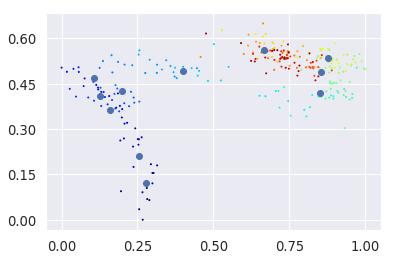

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_19_long_traj
0.2509226181146967
(31, array([28, 35]))


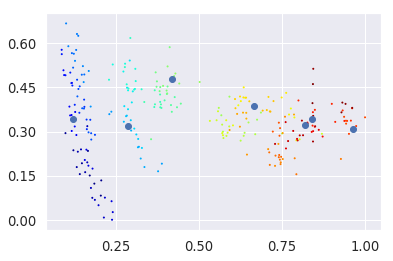

(25, 37)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_1_long_traj
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_26_long_traj
0.31126681873410994
(18, array([14, 25]))


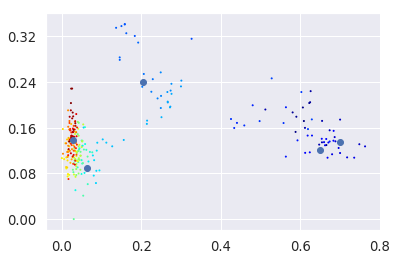

(12, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_32_long_traj
0.2691592206947904
(22, array([16, 24]))


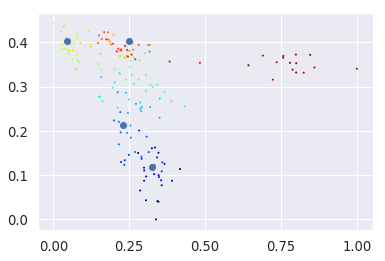

(16, 28)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_3_long_traj
0.3224373890874368
(39, array([25, 45]))


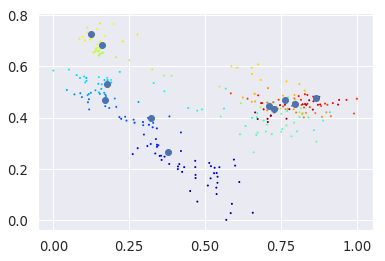

(25, 45)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_4_long_traj
0.3412559050978613
(9, array([ 0, 13]))


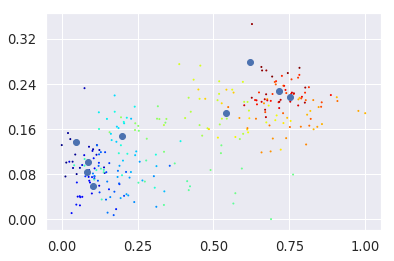

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy6_9_long_traj
0.429095330411782
(8, array([ 8, 16]))


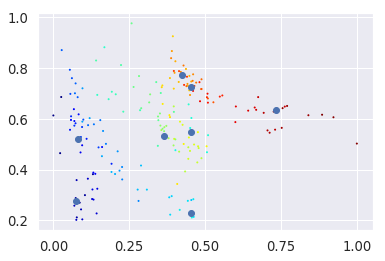

(2, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_10_long_traj
0.39680164130551143
(16, array([15, 22]))


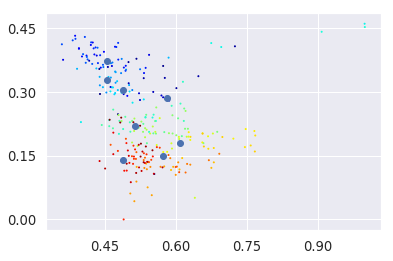

(10, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_11_long_traj
0.35316702339842043
(4, array([ 0, 14]))


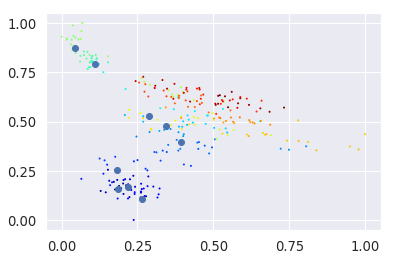

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_14_long_traj
0.37987178989604825
(32, array([ 8, 42]))


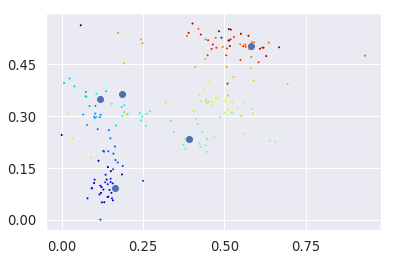

(8, 42)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_18_long_traj
0.5478152385485211
(26, array([23, 31]))


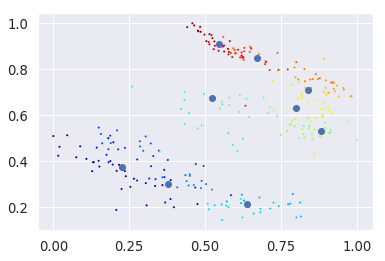

(20, 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_19_long_traj
0.3052039515851563
(13, array([11, 21]))


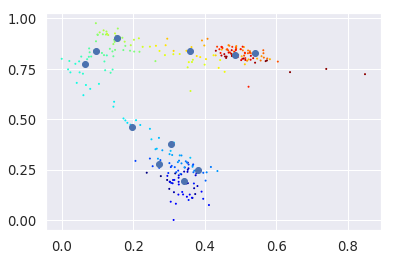

(7, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_1_long_traj
0.5469867449971308
(11, array([11, 18]))


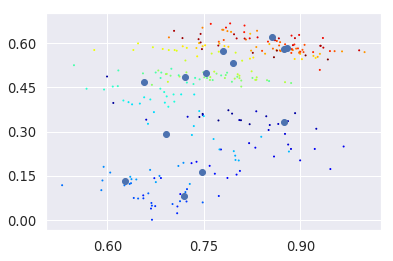

(5, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_20_long_traj
0.3347188403743737
(5, array([0, 7]))


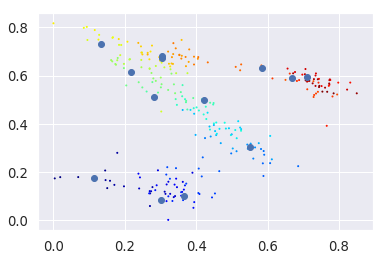

(0, 11)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_21_long_traj
0.3303721645937119
(12, array([ 9, 22]))


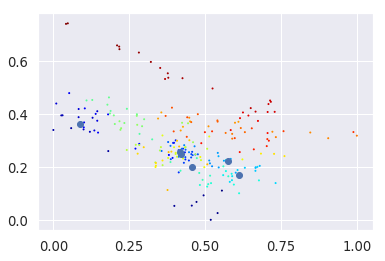

(9, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_22_long_traj
0.3423110341396811
(2, array([0, 7]))


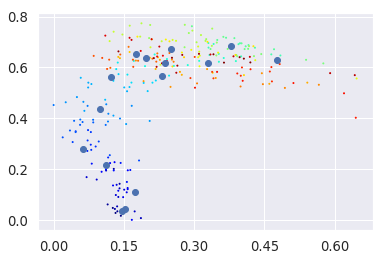

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_24_long_traj
0.4619136215828777
(23, array([ 9, 43]))


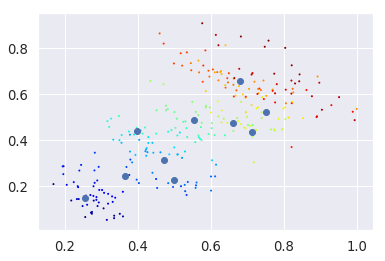

(9, 43)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_26_long_traj
0.44445656876796513
(9, array([ 3, 16]))


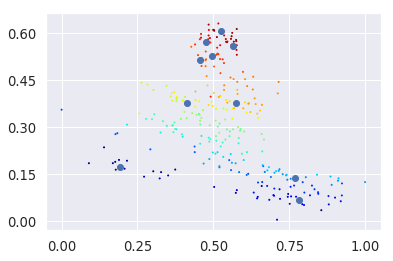

(3, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_29_long_traj
0.5473773425240281
(14, array([12, 27]))


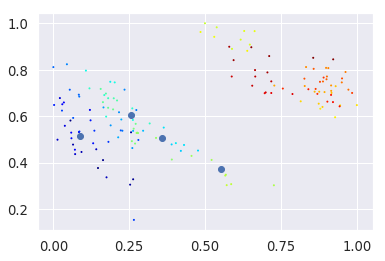

(12, 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_32_long_traj
0.3129732000052352
(29, array([19, 30]))


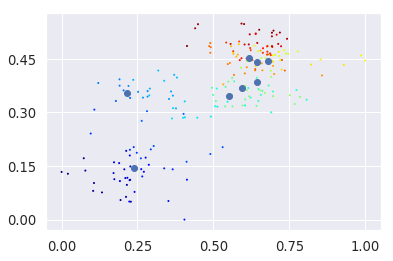

(19, 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy7_9_long_traj
0.3943752385942838
(2, array([0, 7]))


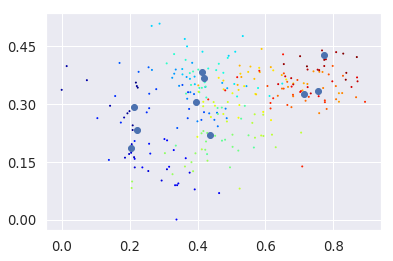

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_17_long_traj
0.7643038284950303
(35, array([33, 40]))


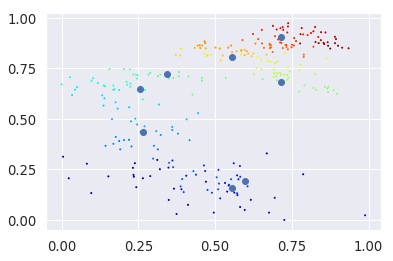

(29, 41)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_18_long_traj
0.3783756817844216
(42, array([ 0, 50]))


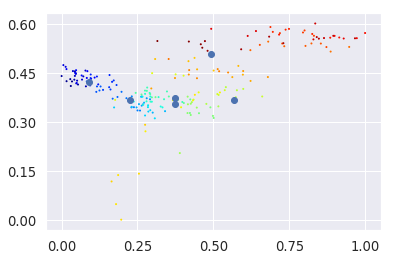

(0, 50)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_19_long_traj
0.2934220267305546
(22, array([12, 23]))


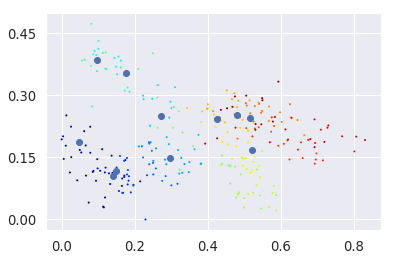

(12, 28)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_20_long_traj
0.5138722274945446
(0, array([0, 8]))


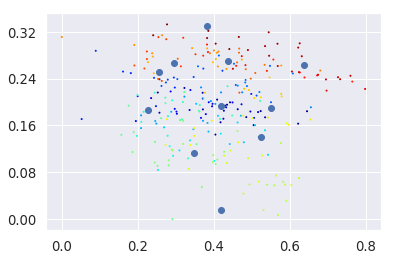

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_26_long_traj
0.4378675007769673
(39, array([38, 45]))


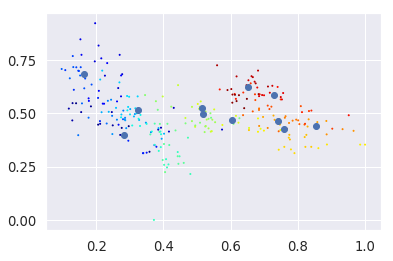

(33, 45)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy8_27_long_traj
0.42678977614640234
(9, array([ 2, 16]))


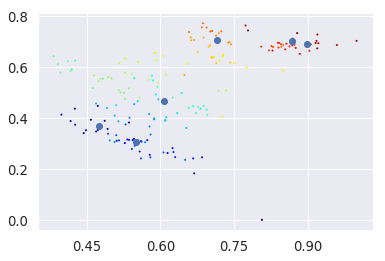

(2, 16)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_11_long_traj
0.43586665278000575
(15, array([ 7, 27]))


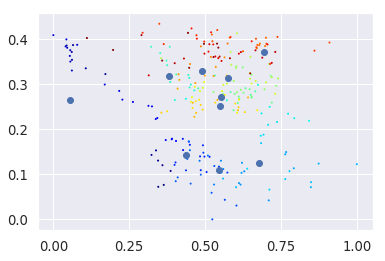

(7, 27)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_12_long_traj
0.57729229260713


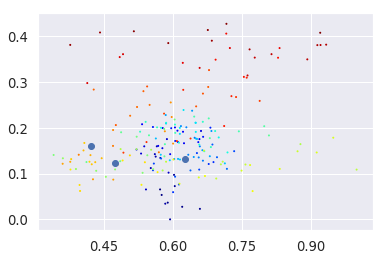

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_13_long_traj
0.46043242205414175
(38, array([30, 38]))


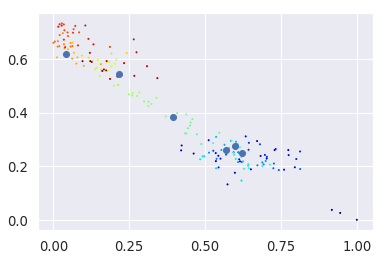

(30, 44)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_14_long_traj
0.291050826549996
(4, array([0, 9]))


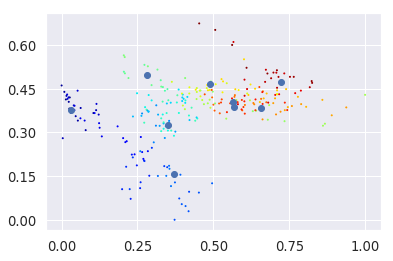

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_18_long_traj
0.3685522359247059


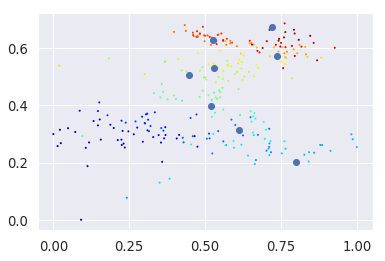

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_19_long_traj
0.5397722909016693
(7, array([ 7, 14]))


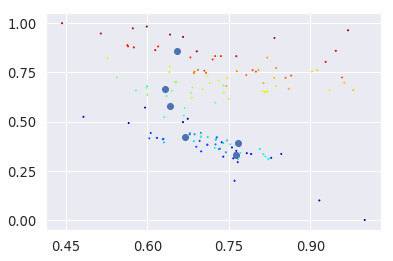

(1, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_20_long_traj
0.52046988594416


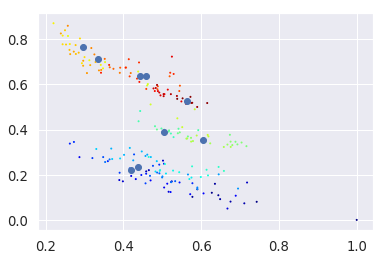

/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_22_long_traj
0.3683166324374078
(38, array([34, 49]))


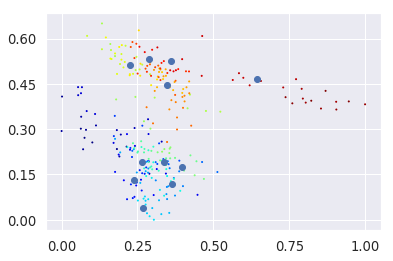

(34, 49)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_23_long_traj
0.28411288491737563
(9, array([ 8, 15]))


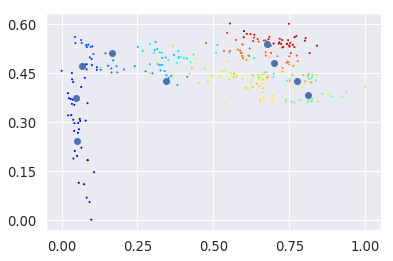

(3, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_26_long_traj
0.28919730725717396
(0, array([0, 8]))


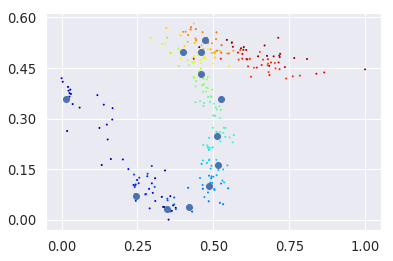

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_2_long_traj
0.332904759163739
(1, array([ 0, 14]))


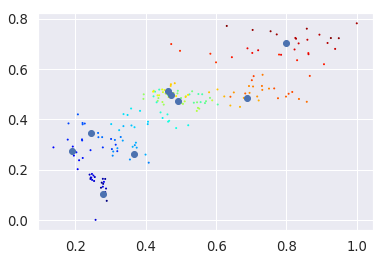

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_32_long_traj
0.5187740595340269
(7, array([ 3, 10]))


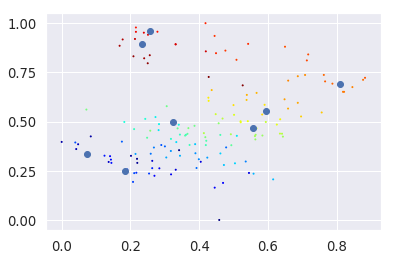

(1, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_37_long_traj
0.2454196418954728
(11, array([ 0, 14]))


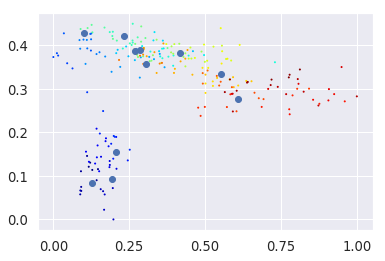

(0, 14)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_40_long_traj
0.348573225668372
(13, array([12, 21]))


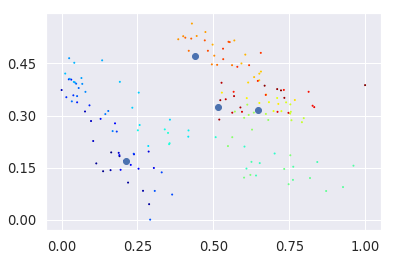

(7, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_4_long_traj
0.2903025434835518
(6, array([ 5, 12]))


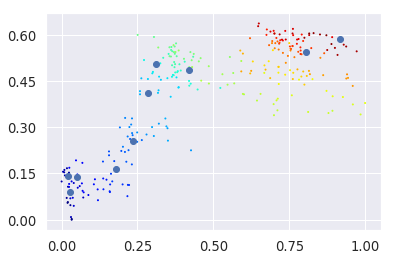

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_5_long_traj
0.3751449961106961
(8, array([ 8, 15]))


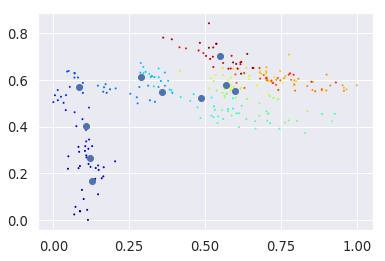

(2, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/fluor_sct_xy9_8_long_traj
0.2309909949519613
(45, array([37, 45]))


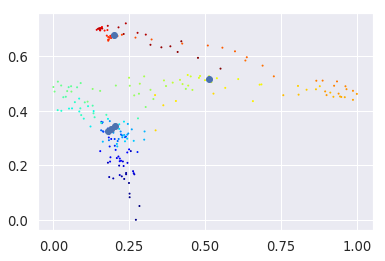

(37, 51)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy10_30_long_traj
0.2752837753259372
(6, array([ 0, 10]))


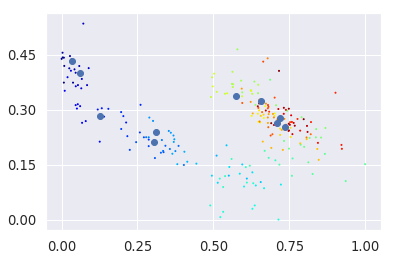

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy10_32_long_traj
0.3484593296777134
(10, array([ 2, 33]))


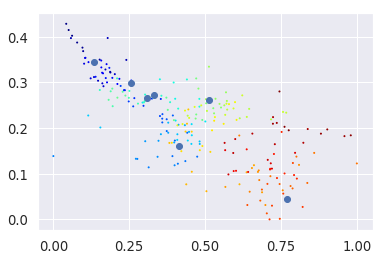

(2, 33)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy11_27_long_traj
0.23856892532958152
(3, array([ 2, 10]))


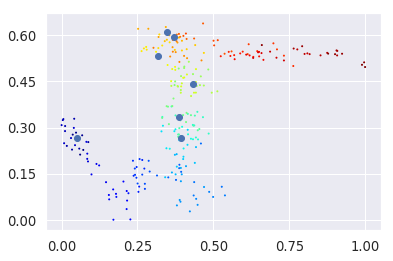

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_23_long_traj
0.27201864390835406
(19, array([17, 24]))


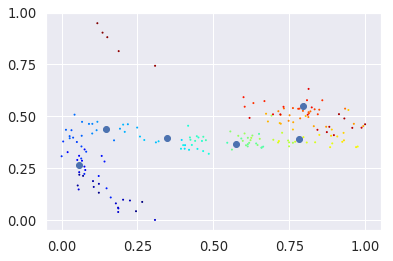

(13, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_25_long_traj
0.3428992545526854
(33, array([32, 39]))


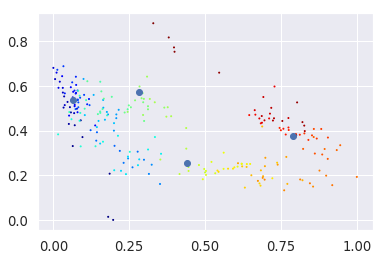

(27, 39)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_31_long_traj
0.3532824465298219
(2, array([0, 8]))


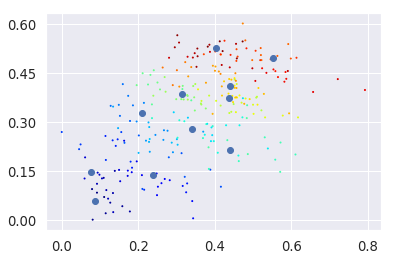

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_32_long_traj
0.30551214393361803
(9, array([ 0, 13]))


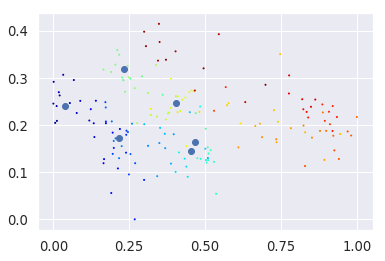

(0, 13)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_43_long_traj
0.4396309351904031
(5, array([ 2, 18]))


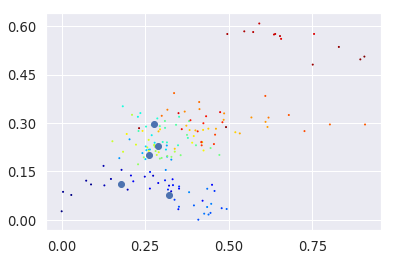

(2, 18)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy13_44_long_traj
0.472997047395765
(15, array([ 6, 23]))


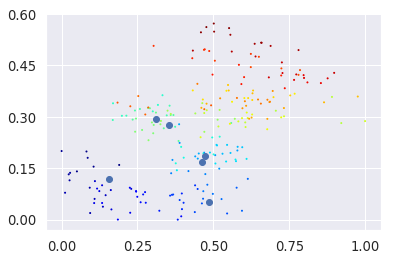

(6, 23)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy16_23_long_traj
0.23096983413764
(15, array([10, 25]))


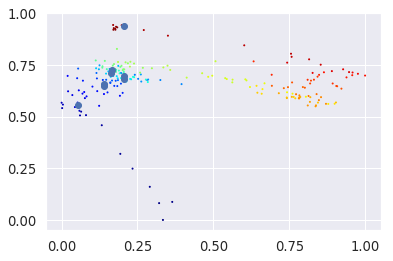

(10, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy17_11_long_traj
0.4058314627541466
(12, array([12, 21]))


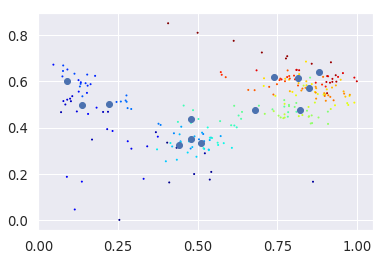

(6, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy19_21_long_traj
0.5179918301327424
(29, array([23, 30]))


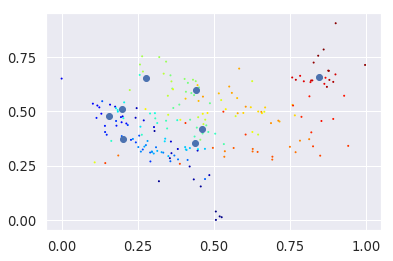

(23, 35)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy19_27_long_traj
0.37894642253398797
(18, array([ 7, 45]))


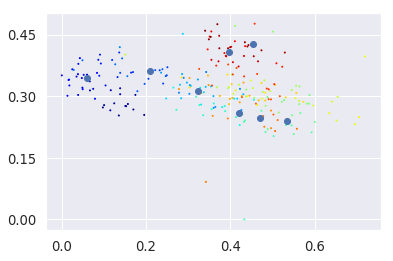

(7, 45)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy19_28_long_traj
0.2827420398315656
(7, array([ 0, 15]))


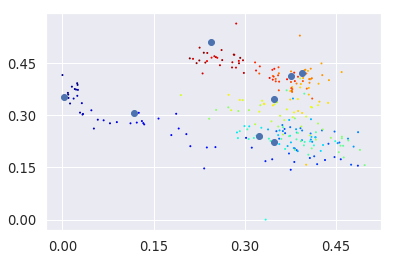

(0, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy1_12_long_traj
0.3374760674577321
(42, array([38, 50]))


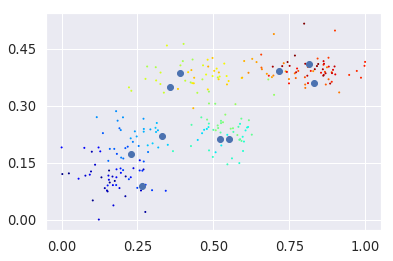

(38, 50)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy1_13_long_traj
0.4464785151594885
(26, array([22, 29]))


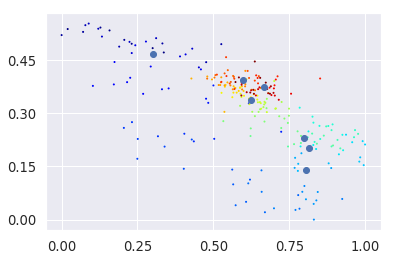

(20, 32)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy1_7_long_traj
0.37670264377132795
(8, array([ 0, 17]))


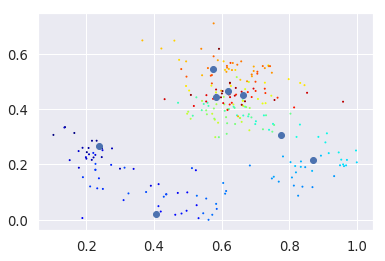

(0, 17)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy20_6_long_traj
0.30960212301394674
(40, array([30, 47]))


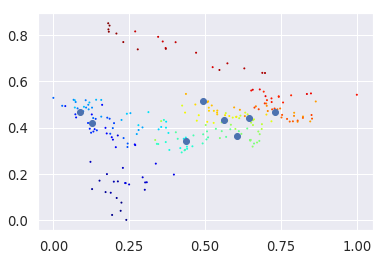

(30, 47)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy2_24_long_traj
0.43360664640293867
(31, array([31, 42]))


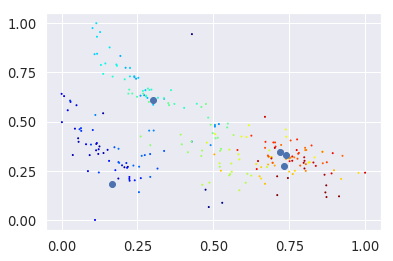

(25, 42)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy2_25_long_traj
0.29392863290520754
(26, array([16, 30]))


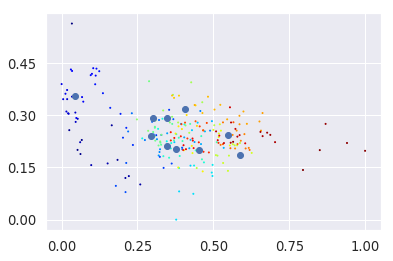

(16, 30)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy2_27_long_traj
0.3137458516007265
(20, array([13, 20]))


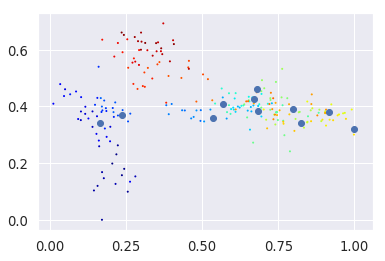

(13, 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy2_29_long_traj
0.3353549147385004
(35, array([32, 41]))


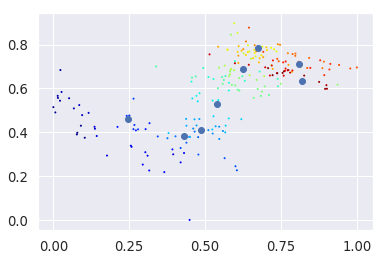

(29, 41)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy4_36_long_traj
0.3585165756398891
(7, array([ 3, 15]))


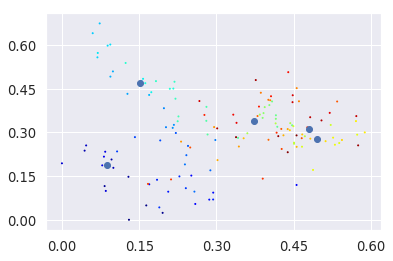

(3, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy4_40_long_traj
0.4609849564050848
(21, array([14, 33]))


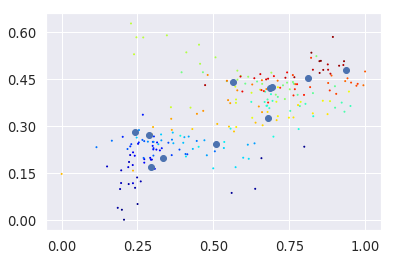

(14, 33)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy4_41_long_traj
0.3338430863870572
(16, array([ 9, 18]))


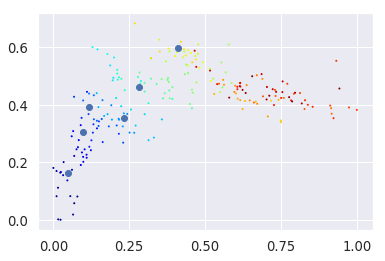

(9, 22)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy4_42_long_traj
0.461466557704432
(21, array([ 4, 29]))


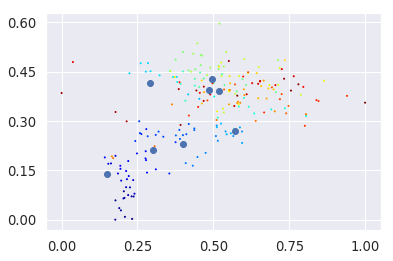

(4, 29)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy5_18_long_traj
0.47301205647914335
(19, array([15, 26]))


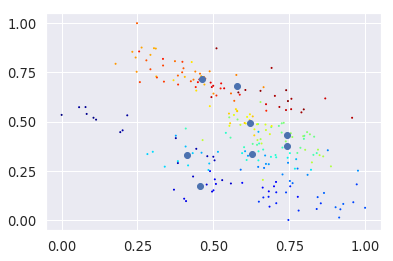

(13, 26)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy5_19_long_traj
0.3747634072897371
(17, array([16, 25]))


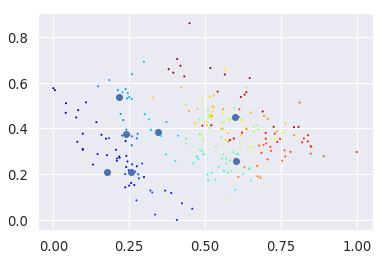

(11, 25)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy6_25_long_traj
0.3722236860724312
(15, array([13, 21]))


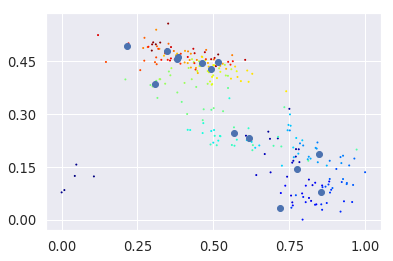

(9, 21)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy7_33_long_traj
0.4783385208967462
(7, array([ 3, 15]))


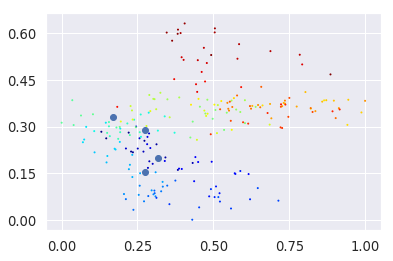

(3, 15)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy7_35_long_traj
0.3400266566057992
(1, array([ 0, 10]))


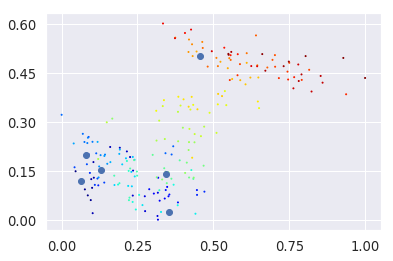

(0, 10)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy7_37_long_traj
0.3972624275150118
(6, array([0, 9]))


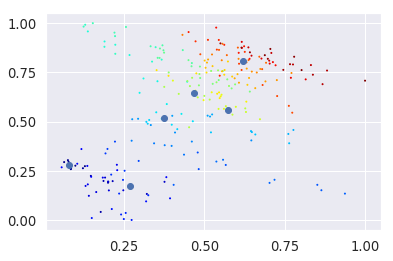

(0, 12)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy8_35_long_traj
0.39714073978602865
(2, array([0, 7]))


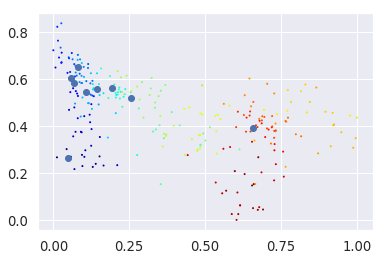

(0, 8)
/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/result_bgcorr_norm/single_cell_traj/sub_sct_xy8_3_long_traj
0.3918270469684568
(13, array([ 6, 19]))


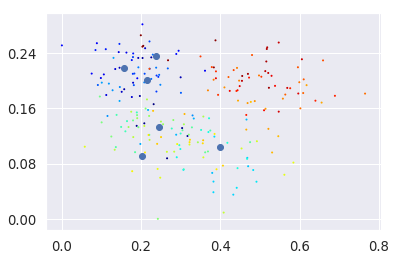

(6, 19)
201


In [90]:
wd_size=12
scale_features=[]
scale_contours=[]
all_vim0=[]
all_t0=[]
all_haralick0=[]

all_ori_morph_cord=[]
all_ori_vim_cord=[]

count=0

for i in range(len(sct_list)):
    print(sct_list[i])
    with open (sct_list[i], 'rb') as fp:
        sct = pickle.load(fp)
    
    mask=sct.traj_vimentin_feature_values[0]!=0
    traj_t=sct.traj_seri[mask][:,0]
    traj_morph=sct.traj_cord[mask]
    traj_vim=sct.traj_vimentin_haralick_pca_cord[mask]
    traj_vim_haralick=sct.traj_vimentin_feature_values[3][mask]
    
#     if np.mean(traj_morph[:24,0])<100 and np.mean(traj_vim[:24,0])<2:
    if np.mean(traj_morph[:36,0])<np.mean(traj_morph[-36:,0]) or np.mean(traj_vim[:36,0])<np.mean(traj_vim[-36:,0]):
    
    #     dot_color=np.arange(traj_t.shape[0])
    #     cm=plt.cm.get_cmap('jet')
    #     sc=plt.scatter(traj_vim[:,0],traj_vim[:,1],c=dot_color,cmap=cm)
    #     plt.colorbar(sc)
    #     plt.show()

    # #     plt.scatter(np.arange(morph_smad.shape[0]),np.sum(morph_smad,axis=1),s=2,color='b')#,c=dot_color[:-12],cmap=cm)
    #     plt.scatter(np.arange(morph_sstd.shape[0]),np.sum(morph_sstd,axis=1),s=2,c=dot_color[:-wd_size],cmap=cm)
    #     plt.show()


    #     traj_scale_contour,traj_scale_haralick=traj_scaling(sct,wd_size=12,t_range=72,sort_range=6)
        traj_scale_contour,traj_scale_contour_with_vim,traj_scale_haralick,scale_t=sp_traj_scaling(sct,t_cutoff=6,t_range=48)
#         traj_scale_contour,traj_scale_contour_with_vim,traj_scale_haralick,morph_scale_t,vim_scale_t=ssp_traj_scaling(sct)

    #     dot_color=np.arange(traj_t.shape[0])
    #     cm=plt.cm.get_cmap('jet')
    #     sc=plt.scatter(traj_t,sct.traj_vimentin_feature_values[0][mask],c=dot_color,cmap=cm)
    #     plt.colorbar(sc)
    #     plt.show()
        if len(traj_scale_contour)>0:
            scale_contours.append(traj_scale_contour_with_vim)
        #     all_vim0.append(traj_vim)
            all_haralick0.append(traj_scale_haralick)
            all_t0.append(traj_t)

            all_ori_morph_cord.append(traj_morph)
            all_ori_vim_cord.append(traj_vim)
            count+=1
print(count)

In [91]:
# all_t=np.concatenate(all_t0,axis=0)

# mask1=all_t<24
# ori_morph=np.vstack(all_ori_morph_cord)
# ori_vim=np.vstack(all_ori_vim_cord)

# E_data=np.column_stack((ori_morph[mask1],ori_vim[mask1]))


# mask2=(all_t>60)&(all_t<84)
# P_data=np.column_stack((ori_morph[mask2],ori_vim[mask2]))


# mask3=all_t>552
# M_data=np.column_stack((ori_morph[mask3],ori_vim[mask3]))
# plt.scatter(P_data[:,0],P_data[:,8],s=1,color='r')

# plt.scatter(E_data[:,0],E_data[:,8],s=0.1,color='b')
# # plt.scatter(M_data[:,0],M_data[:,8],s=1,color='r')
# plt.show()

In [92]:
X1=np.vstack(scale_contours)
print(X1.shape)
pca1 = decomposition.PCA(n_components =0.98,svd_solver= 'full')
Y1 = pca1.fit_transform(X1)
print(pca1.explained_variance_ratio_)



X2=np.vstack(all_haralick0)
# print(np.concatenate(all_t0).shape)
# # t_mask=np.concatenate(all_t0)<144   
# # # X2=np.vstack(scale_vim)
scaler2 = StandardScaler()

X2=scaler2.fit_transform(X2)
# print(X2.shape)


pca2 = decomposition.PCA(n_components =0.98,svd_solver= 'full')
Y2 = pca2.fit_transform(X2)
print(pca2.explained_variance_ratio_)

with open (main_path+'scale_morph_pca', 'wb') as fp:
    pickle.dump(pca1,fp)
with open (main_path+'vimentin_haralick_scaler', 'wb') as fp:
    pickle.dump(scaler2,fp)
with open (main_path+'vimentin_haralick_scale_pca', 'wb') as fp:
    pickle.dump(pca2,fp)

(51034, 300)
[0.8350034  0.09834498 0.01415986 0.01252001 0.0090582  0.00775496
 0.0044939 ]
[0.58234735 0.21485381 0.08587007 0.05405747 0.02729872 0.01251357
 0.01125967]


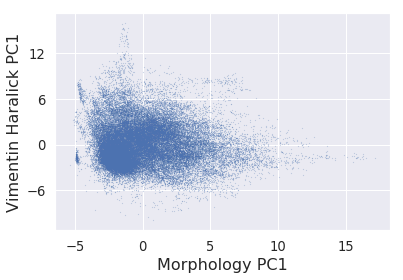

(array([2.68174382, 0.92034204, 0.34922285, 0.32837913, 0.27931488,
       0.25844186, 0.19673655]), array([2.75145699, 1.67125688, 1.05655613, 0.83830011, 0.59572083,
       0.40333168, 0.38259077]))


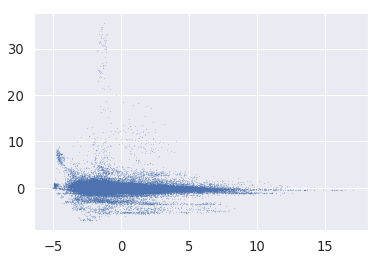

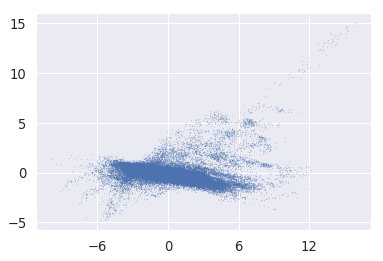

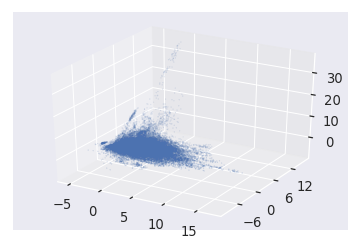

In [93]:

plt.scatter(Y1[:,0],Y2[:,0],s=0.01)
# plt.axis([-4,4,-4,4])
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.savefig(result_path+'all_scatter.png',dpi=300)
plt.show()

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.kdeplot(Y1[:,0],Y2[:,0],n_levels=50,shade=True,cmap=cmap)
# # plt.axis([-4,4,-100,200])
# # plt.savefig(result_path+'all_kde.png',dpi=300)

# plt.show()

print(np.std(Y1,axis=0),np.std(Y2,axis=0))
plt.scatter(Y1[:,0],Y2[:,1],s=0.01)
plt.show()
plt.scatter(Y2[:,0],Y2[:,2],s=0.01)
plt.show()


# plt.scatter(Y[:,0],Y[:,1],s=0.01)
# plt.show()
# # sns.kdeplot(Y[:,0],Y[:,1],n_levels=50,shade=True)
# # # # plt.axis([-2.5,2.5,-2.5,2.5])
# # plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(Y1[:,0],Y2[:,0],Y2[:,1],s=0.01)
# #     ax.view_init(50, 25)
plt.show()

(array([7.19189082, 0.84704607, 0.12195899, 0.10783496, 0.07801833,
       0.0667935 , 0.03870603]), array([0.8350034 , 0.09834498, 0.01415986, 0.01252001, 0.0090582 ,
       0.00775496, 0.0044939 ]))


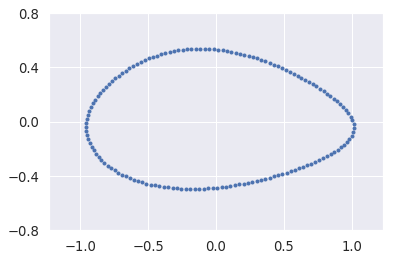

points = shape_array0
points = shape_array1
points = shape_array3


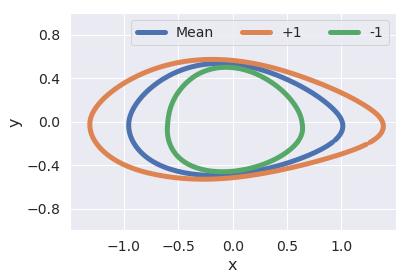

points = shape_array0
points = shape_array1
points = shape_array3


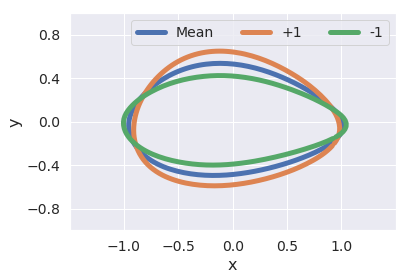

In [94]:
variances=pca1.explained_variance_
variance_ratio=pca1.explained_variance_ratio_ 
tot_variance=np.sum(variances)
stds=np.sqrt(variances)
print(variances,pca1.explained_variance_ratio_)

plt.plot(pca1.mean_[0::2],pca1.mean_[1::2],'.')
plt.axis('equal')
plt.axis([-1.5,1.5,-0.8,0.8])
# plt.savefig(result_path+'mean_contour.png',dpi=300)

plt.show()

#-------plot principal modes-------------------------
for pci in range(2):#variances.shape[0]):
    cell_posi=np.zeros((variances.shape[0],))
    mode_std1=copy.copy(cell_posi)
    mode_std1[pci]=1
    mode_std2=copy.copy(cell_posi)
    mode_std2[pci]=2
    mode_std_1=copy.copy(cell_posi)
    mode_std_1[pci]=-1
    mode_std_2=copy.copy(cell_posi)
    mode_std_2[pci]=-2

    shape_array0=pca1.inverse_transform(cell_posi*stds)
    shape_array1=pca1.inverse_transform(mode_std1*stds)
    shape_array2=pca1.inverse_transform(mode_std2*stds)
    shape_array3=pca1.inverse_transform(mode_std_1*stds)
    shape_array4=pca1.inverse_transform(mode_std_2*stds)

    for i in [0,1,3]:
        com_str='points = shape_array'+str(i)
        print(com_str)
        exec(com_str)
    #     print(points.shape)
        #fig, ax = plt.subplots(figsize=(12, 12))

        plt.plot(points[0::2], points[1::2], '-',linewidth=5)
        plt.legend(('Mean','+1','-1'),fontsize=14,ncol=3)
    plt.xlabel('x',fontsize=16)
    plt.ylabel('y',fontsize=16)

    plt.xticks(np.arange(-1,1.1,0.5),fontsize=14)
    plt.yticks(np.arange(-0.8,0.9,0.4),fontsize=14)
    plt.xlim(-1.5,1.5)
    plt.ylim(-1,1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.savefig(result_path+'mode'+str(pci+1)+'.png',dpi=300)   
    plt.show()



In [95]:
# from pomegranate import *
# EM_data=np.vstack((E_data,M_data))
# gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, EM_data)
# gmm_proba=gmm.predict_proba(EM_data)
# gmm_labels=gmm.predict(EM_data)

# plt.scatter(EM_data[:,0],EM_data[:,1],c=gmm_labels,s=1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.axis('equal')
# plt.show()

In [96]:
def plot_gmm(data,gmm):

#     plt.hist(data,bins=30,weights=np.ones_like(data)/float(len(data)))

    x = np.linspace(mquantiles(data,[0.01])[0], mquantiles(data,[0.99])[0], 1000).reshape(1000,1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)
    plt.figure(figsize=(8,6))
    plt.plot(x, pdf, '-b')
#     plt.xlabel('Morphology PC1',fontsize=16)

    plt.xlabel('Vimentin Haralick PC4',fontsize=16)
    plt.ylabel('Log likelihood',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.savefig(result_path+'vim_pc4_gmm.png',dpi=300)
    plt.show()
    
#     plt.hist(gmm.predict_proba(x))
#     plt.show()
    
    sns.kdeplot(data[(data>mquantiles(data,[0.02])[0])&(data<mquantiles(data,[0.98])[0])],color='blue')
#     plt.xlabel('Vimentin Haralick PC4',fontsize=16)
#     plt.ylabel('Log likelihood',fontsize=16)
    plt.show()

[0.89649763 0.831763   0.31000283 0.28112253]
[2.2231037  1.91933342 0.7333404  0.53293631]
[2.94820659 2.43965491 1.22674182 0.75213918]
1.1548426897


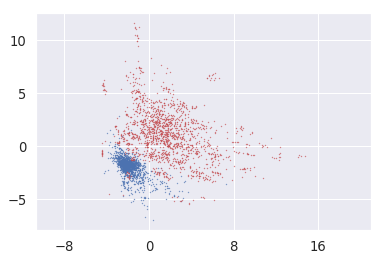

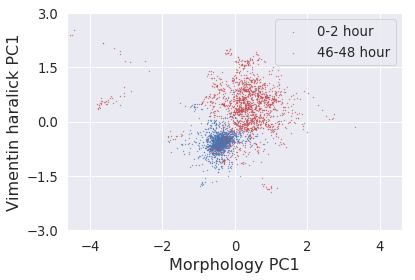

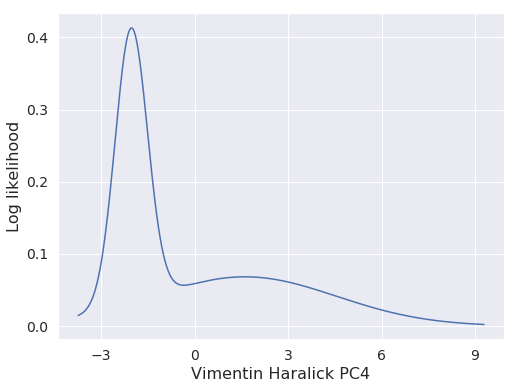

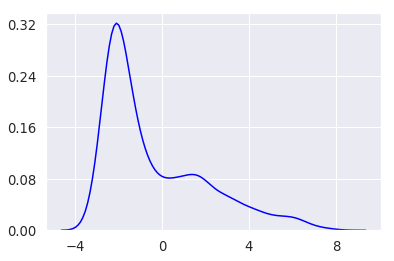

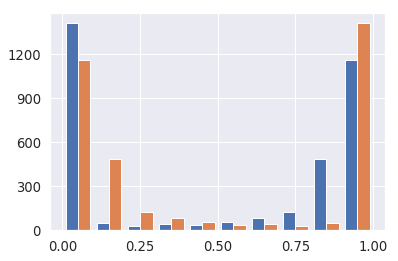

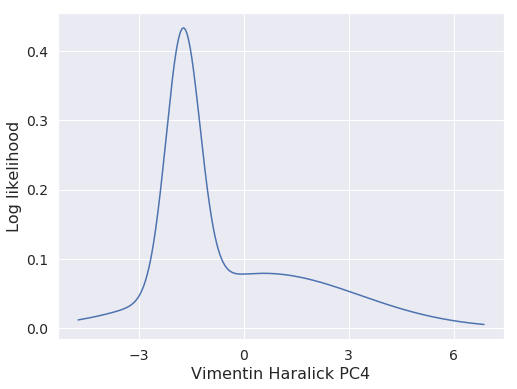

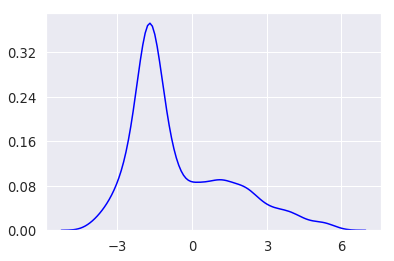

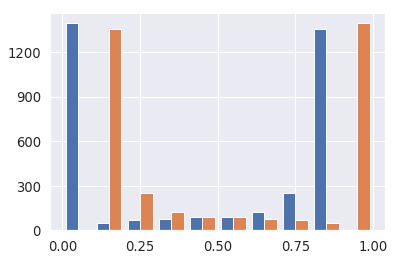

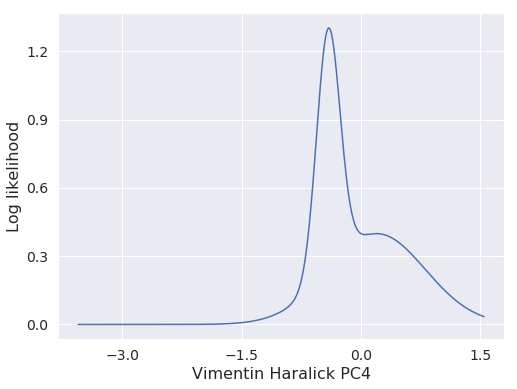

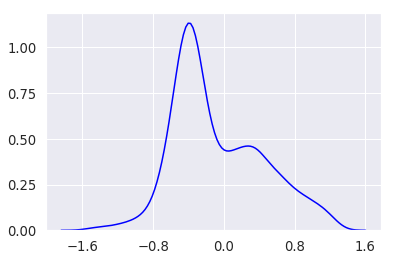

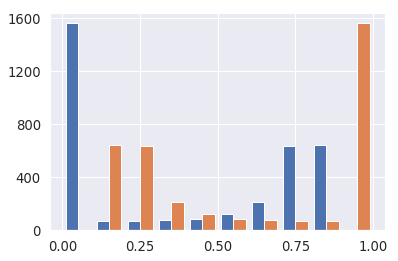

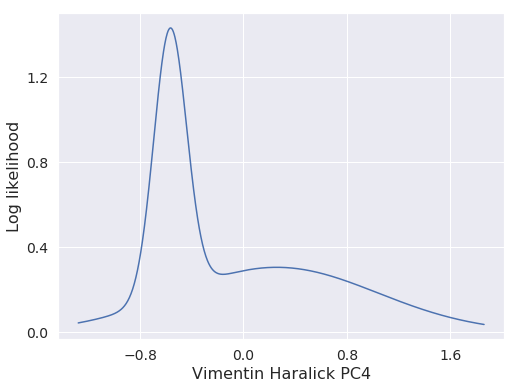

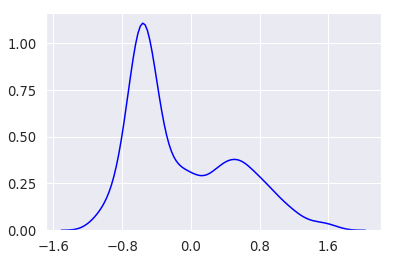

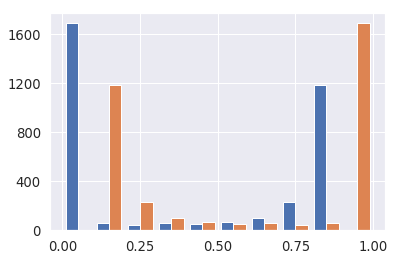

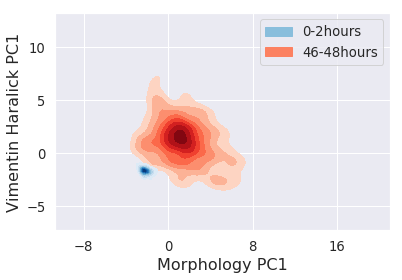

In [101]:

morph_pc_scaler=StandardScaler().fit(Y1.flatten()[:,None])
with open (main_path+'morph_pc_scaler', 'wb') as fp:
    pickle.dump(morph_pc_scaler,fp)
vim_pc_scaler=StandardScaler().fit(Y2.flatten()[:,None])
with open (main_path+'vim_pc_scaler', 'wb') as fp:
    pickle.dump(vim_pc_scaler,fp)
    
    
all_t=np.concatenate(all_t0,axis=0)

sY1=Y1.copy()
sY2=Y2.copy()
for i1 in range(Y1.shape[1]):
    sY1[:,i1]=morph_pc_scaler.transform(Y1[:,i1][:,None])[:,0]
for i2 in range(Y2.shape[1]):
    sY2[:,i2]=vim_pc_scaler.transform(Y2[:,i2][:,None])[:,0]
    
sY2[:,2]=-sY2[:,2]

mask1=all_t<24
E_data=np.column_stack((sY1[mask1][:,0],sY2[mask1][:,[0,2,3]]))
print(np.std(E_data,axis=0))

mask2=(all_t>276)&(all_t<301)
P_data=np.column_stack((sY1[mask2][:,0],sY2[mask2][:,[0,2,3]]))
print(np.std(P_data,axis=0))
mask3=all_t>552
# mask4=Y1[:,0]>-3
M_data=np.column_stack((sY1[mask3][:,0],sY2[mask3][:,[0,2,3]]))
print(np.std(M_data,axis=0))
print(E_data.shape[0]*1.0/M_data.shape[0])


E_data_7d=np.column_stack((sY1[mask1][:,:3],sY2[mask1][:,:4]))
M_data_7d=np.column_stack((sY1[mask3][:,:3],sY2[mask3][:,:4]))
EM_data_7d=np.vstack((E_data_7d,M_data_7d))


# mask=clustering.labels_==0
# M_data=M_data[mask]

EM_data=np.vstack((E_data,M_data))
yl=np.concatenate((np.zeros((E_data.shape[0],)),np.ones((M_data.shape[0]))))
tl=['0-2hour','46-48hour']
t_label=[tl[int(i)] for i in yl]
EPM_data=np.vstack((EM_data,P_data))

# clustering = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(M_data)
# clustering=SpectralClustering(n_clusters=2).fit(M_data)
#clustering=MeanShift(bandwidth=1,cluster_all=False).fit(EM_data)
#clustering = DBSCAN(eps=1, min_samples=50).fit(EM_data)
# print(np.unique(clustering.labels_))
# plt.scatter(M_data[:,0],M_data[:,1],c=clustering.labels_,s=1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()


plt.scatter(E_data[:,0],E_data[:,1],s=0.1,color='b')
plt.scatter(M_data[:,0],M_data[:,1],s=0.1,color='r')
# plt.scatter(P_data[:,0],P_data[:,1],s=0.1,color='g')
plt.axis('equal')
plt.show()




# E_data=PC1_scaler.transform(E_data)
# M_data=PC1_scaler.transform(M_data)
# EM_data=PC1_scaler.transform(EM_data)


plt.scatter(E_data[:,2],E_data[:,3],s=0.1,color='b')
plt.scatter(M_data[:,2],M_data[:,3],s=0.1,color='r')
# plt.scatter(P_data[:,0],P_data[:,1],s=0.1,color='g')
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin haralick PC1',fontsize=16)
plt.legend(['0-2 hour','46-48 hour'])
plt.axis('equal')
plt.axis([-3,3,-3,3])
plt.show()


gmm0=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,0][:,None])
ori_gmm0_proba=gmm0.predict_proba(EM_data[:,0][:,None])
ori_label0=gmm0.predict(EM_data[:,0][:,None])

ord_label0=np.sort(np.unique(ori_label0))[np.argsort(gmm0.means_[:,0])]
gmm0_label=ori_label0.copy()
gmm0_proba=ori_gmm0_proba.copy()
for l in range(len(ord_label0)):
    gmm0_label[np.where(ori_label0==ord_label0[l])]=l
    gmm0_proba[:,l]=ori_gmm0_proba[:,ord_label0[l]]
plot_gmm(EM_data[:,0],gmm0)
plt.hist(gmm0_proba)
plt.show()

gmm1=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,1][:,None])

ori_gmm1_proba=gmm1.predict_proba(EM_data[:,1][:,None])

ori_label1=gmm1.predict(EM_data[:,1][:,None])
ord_label1=np.sort(np.unique(ori_label1))[np.argsort(gmm1.means_[:,0])]
gmm1_label=ori_label1.copy()
gmm1_proba=ori_gmm1_proba.copy()
for l in range(len(ord_label1)):
    gmm1_label[np.where(ori_label1==ord_label1[l])]=l
    gmm1_proba[:,l]=ori_gmm1_proba[:,ord_label1[l]]
plot_gmm(EM_data[:,1],gmm1)
plt.hist(gmm1_proba)
plt.show()


# gmm2=mixture.BayesianGaussianMixture(n_components=2,covariance_type='full', weight_concentration_prior_type='dirichlet_process').fit(EM_data[:,2][EM_data[:,2]<3][:,None])
gmm2=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,2][EM_data[:,2]>-1.5][:,None])

# gmm2=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,2][:,None])

ori_gmm2_proba=gmm2.predict_proba(EM_data[:,2][:,None])
ori_label2=gmm2.predict(EM_data[:,2][:,None])
ord_label2=np.sort(np.unique(ori_label2))[np.argsort(gmm2.means_[:,0])]
gmm2_label=ori_label2.copy()
gmm2_proba=ori_gmm2_proba.copy()
for l in range(len(ord_label2)):
    gmm2_label[np.where(ori_label2==ord_label2[l])]=l
    gmm2_proba[:,l]=ori_gmm2_proba[:,ord_label2[l]]

plot_gmm(EM_data[:,2],gmm2)
plt.hist(gmm2_proba)
plt.show()
# gmm3=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,3][EM_data[:,3]>-1.5][:,None])

# gmm3=mixture.GaussianMixture(n_components=2,covariance_type='full').fit(EM_data[:,3][:,None])
ori_gmm3_proba=gmm3.predict_proba(EM_data[:,3][:,None])

ori_label3=gmm3.predict(EM_data[:,3][:,None])
ord_label3=np.sort(np.unique(ori_label3))[np.argsort(gmm3.means_[:,0])]
gmm3_label=ori_label3.copy()
gmm3_proba=ori_gmm3_proba.copy()

for l in range(len(ord_label3)):
    gmm3_label[np.where(ori_label3==ord_label3[l])]=l
    gmm3_proba[:,l]=ori_gmm3_proba[:,ord_label3[l]]

plot_gmm(EM_data[:,3],gmm3)
plt.hist(gmm3_proba)
plt.show()



# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.kdeplot(EM_data[:,0],EM_data[:,1],n_levels=30,shade=True,cmap=cmap)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis('equal')
# # plt.savefig(result_path+'EM_kde.png',dpi=300)
# plt.show()

label_patch2=mpatches.Patch(color=sns.color_palette('Reds')[2],label='46-48hours')
label_patch1=mpatches.Patch(color=sns.color_palette('Blues')[2],label='0-2hours')
label_patches=[label_patch1,label_patch2]
ax = sns.kdeplot(M_data[:,0],M_data[:,1],cmap="Reds",n_levels=10, shade=True, shade_lowest=False)
ax = sns.kdeplot(E_data[:,0],E_data[:,1],cmap="Blues", n_levels=10, shade=True, shade_lowest=False)
plt.legend(handles=label_patches, loc='upper right')
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
plt.axis('equal')
# plt.savefig(result_path+'EM_kde_seperate.png',dpi=300)
plt.show()

# ax = plt.axes(projection='3d')
# ax.scatter3D(scaler.transform(E_data)[:,0],scaler.transform(E_data)[:,1],scaler.transform(E_data)[:,2],s=0.01,color='r')
# ax.scatter3D(scaler.transform(M_data)[:,0],scaler.transform(M_data)[:,1],scaler.transform(M_data)[:,2],s=0.01,color='b')
# plt.show()

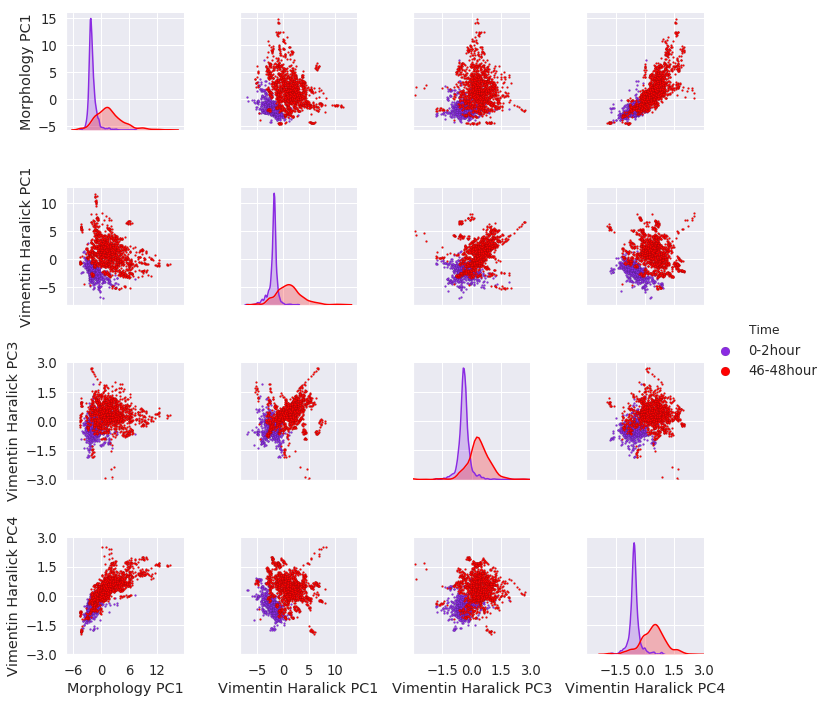

In [102]:
X=EM_data
value_name=['Morphology PC1','Vimentin Haralick PC1','Vimentin Haralick PC3','Vimentin Haralick PC4']
data = pd.DataFrame(X, columns=value_name)
data['Time']=t_label

color_list = ["blueviolet", "red"]
c_map=sns.color_palette(color_list)


sns.set(font_scale=1.2)
g=sns.pairplot(data, hue="Time",diag_kind='kde',vars=value_name,\
             plot_kws=dict(edgecolor='k', linewidth=0.1,s=4),palette=c_map) #markers=["o", "s"])

g.axes[0,2].set_xlim((-3,3))
g.axes[0,3].set_xlim((-3,3))
g.axes[2,0].set_ylim((-3,3))
g.axes[3,0].set_ylim((-3,3))

for lh in g._legend.legendHandles:
    lh.set_alpha(1)
    lh._sizes = [80]

plt.savefig(result_path+'pair_plot.png',dpi=300)
plt.show()

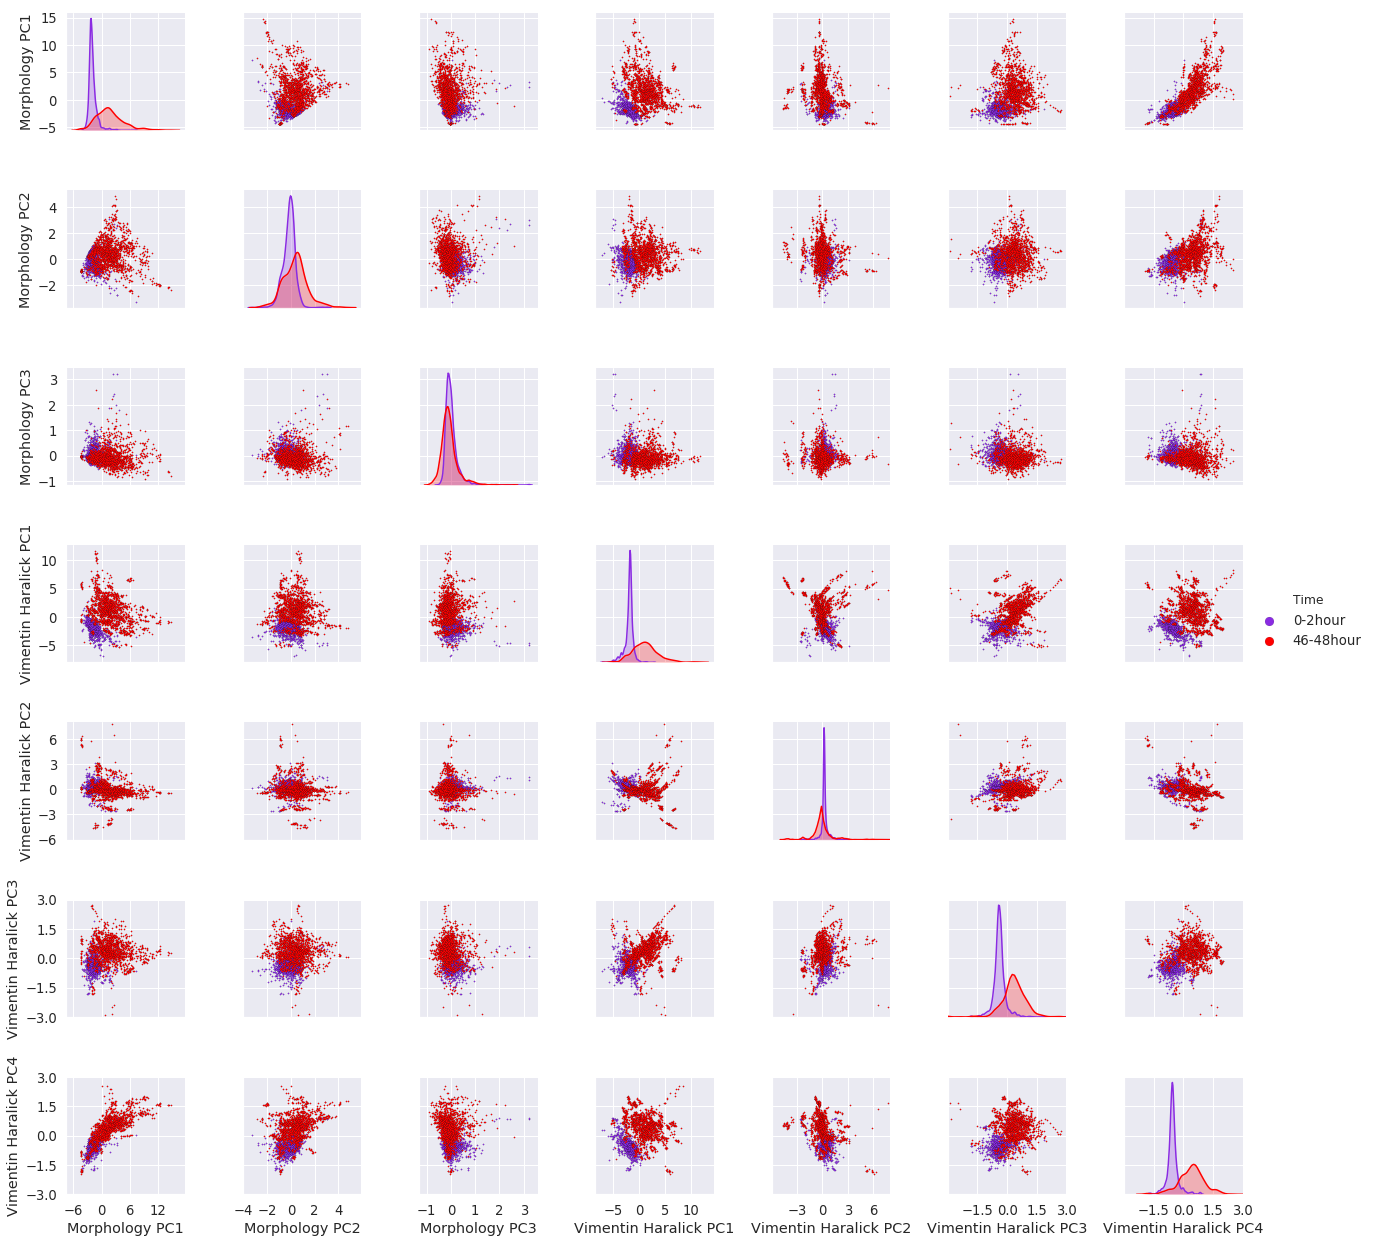

In [103]:
# mask1=all_t<24
# E_data=np.column_stack((sY1[mask1][:,:],sY2[mask1][:,:]))
# print(np.std(E_data,axis=0))

# mask2=(all_t>276)&(all_t<301)
# P_data=np.column_stack((sY1[mask2][:,:],sY2[mask2][:,:]))
# print(np.std(P_data,axis=0))
# mask3=all_t>552
# # mask4=Y1[:,0]>-3
# M_data=np.column_stack((sY1[mask3][:,:],sY2[mask3][:,:]))
# print(np.std(M_data,axis=0))
# print(E_data.shape)
# X=np.vstack((E_data,M_data))
X=EM_data_7d
# value_name=['MPC1','MPC2','MPC3','MPC4','MPC5','MPC6','MPC7','VHPC1','VHPC2','VHPC3','VHPC4','VHPC5','VHPC6','VHPC7']

value_name=['Morphology PC1','Morphology PC2','Morphology PC3','Vimentin Haralick PC1','Vimentin Haralick PC2','Vimentin Haralick PC3','Vimentin Haralick PC4']
# value_name=['Morphology PC1','Vimentin Haralick PC1','Vimentin Haralick PC3','Vimentin Haralick PC4']
data = pd.DataFrame(X, columns=value_name)
data['Time']=t_label

sns.set(font_scale=1.2)
g=sns.pairplot(data, hue="Time",diag_kind='kde',vars=value_name,\
             plot_kws=dict(edgecolor='k', linewidth=0.1,s=2),palette=c_map)
g.axes[0,4].set_xlim((-6,8))
g.axes[4,0].set_ylim((-6,8))

g.axes[0,5].set_xlim((-3,3))
g.axes[0,6].set_xlim((-3,3))
g.axes[5,0].set_ylim((-3,3))
g.axes[6,0].set_ylim((-3,3))

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80]

plt.savefig(result_path+'pair_plot_7D.png',dpi=300)

plt.show()

# g = sns.pairplot(data,hue='time')
# pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

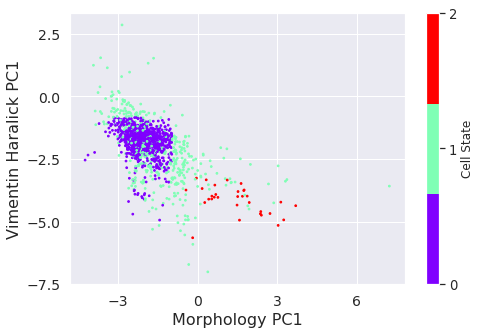

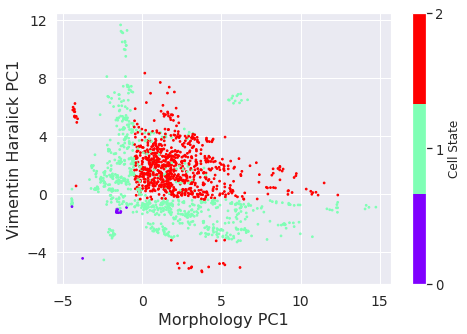

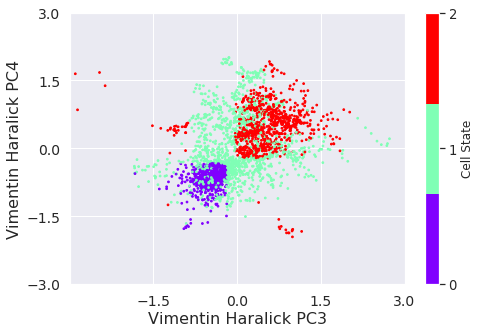

(3493, 4)


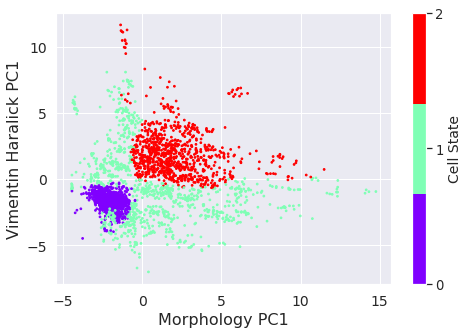

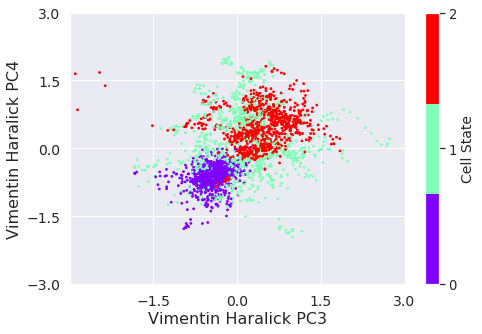

In [106]:
# gmm=mixture.BayesianGaussianMixture(n_components=7,covariance_type='full', weight_concentration_prior_type='dirichlet_process').fit(EM_data)

X=EM_data
yl=np.concatenate((np.zeros((E_data.shape[0],)),np.ones((M_data.shape[0]))))




mask_i=((gmm0_label==0)|(X[:,0]<np.sort(gmm0.means_[:,0])[0]))&\
      ((gmm1_label==0)|(X[:,1]<np.sort(gmm1.means_[:,0])[0]))&\
      ((gmm2_label==0)|(X[:,2]<np.sort(gmm2.means_[:,0])[0]))&\
    ((gmm3_label==0)|(X[:,3]<np.sort(gmm3.means_[:,0])[0]))

#mask_f=(gmm0_proba[:,1]>0.9)&(gmm1_proba[:,1]>0.9)&(gmm2_proba[:,1]>0.9)&(gmm3_proba[:,1]>0.9)
mask_f=((gmm0_proba[:,1]>0.9)|(X[:,0]>np.sort(gmm0.means_[:,0])[1]))&\
    ((gmm1_proba[:,1]>0.9)|(X[:,1]>np.sort(gmm1.means_[:,0])[1]))&\
    ((gmm2_proba[:,1]>0.9)|(X[:,2]>np.sort(gmm2.means_[:,0])[1]))&\
    ((gmm3_proba[:,1]>0.9)|(X[:,3]>np.sort(gmm3.means_[:,0])[1]))


yl[mask_i]=0
yl[mask_f]=2
yl[~(mask_i|mask_f)]=1


cmap = plt.cm.rainbow  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 2, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.figure(figsize=(7.5,5))

plt.scatter(E_data[:, 0], E_data[:, 1], c=yl[:E_data.shape[0]], cmap=cmap,norm=norm, s=3)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=12)
plt.axis('tight')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'E_gmm_label_pc1.png',dpi=300)
plt.show()


plt.figure(figsize=(7.5,5))

plt.scatter(M_data[:, 0], M_data[:, 1], c=yl[E_data.shape[0]:], cmap=cmap,norm=norm, s=3)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=12)
plt.axis('tight')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'M_gmm_label_pc1.png',dpi=300)
plt.show()


plt.figure(figsize=(7.5,5))

plt.scatter(EM_data[:, 2], EM_data[:, 3], c=yl,  cmap=cmap,norm=norm, s=3)
plt.xlabel('Vimentin Haralick PC3',fontsize=16)
plt.ylabel('Vimentin Haralick PC4',fontsize=16)

cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=12)
plt.axis('tight')
plt.axis([-3,3,-3,3])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'gmm_label_pc34.png',dpi=300)

plt.show()


ls2=LabelSpreading(kernel='knn',n_neighbors=50,alpha=0.5)
print(X.shape)
ls2.fit(X,yl)


ls2_labels=ls2.predict(X)
ls2_proba=ls2.predict_proba(X)
plt.figure(figsize=(7.5,5))

plt.scatter(X[:, 0], X[:, 1], c=ls2_labels, zorder=10, cmap=cmap,norm=norm,s=3)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=14)
plt.axis('tight')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'label_pc1.png',dpi=300)

plt.show()

plt.figure(figsize=(7.5,5))

plt.scatter(X[:, 2], X[:, 3], c=ls2_labels, zorder=10, cmap=cmap,norm=norm,s=3)
plt.xlabel('Vimentin Haralick PC3',fontsize=16)
plt.ylabel('Vimentin Haralick PC4',fontsize=16)

cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=14)
plt.axis('equal')
plt.axis('tight')
plt.axis([-3,3,-3,3])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'label_pc34.png',dpi=300)

plt.show()

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# f, ax = plt.subplots()
# points = ax.scatter(X[:,0], X[:,1], c=ls2_proba[:,1], s=2, cmap=cmap)
# f.colorbar(points)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin Haralick PC1',fontsize=16)
# plt.axis('equal')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# # plt.savefig(result_path+'EM_kde.png',dpi=300)
# plt.show()

# f, ax = plt.subplots()
# points = ax.scatter(X[:,2], X[:,3], c=ls2_proba[:,1], s=2, cmap=cmap)
# f.colorbar(points)
# plt.xlabel('Vimentin Haralick PC3',fontsize=16)
# plt.ylabel('Vimentin Haralick PC4',fontsize=16)
# plt.axis('equal')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# # plt.savefig(result_path+'EM_kde.png',dpi=300)
# plt.show()

with open (main_path+'label_spread_4d', 'wb') as fp:
    pickle.dump(ls2,fp)

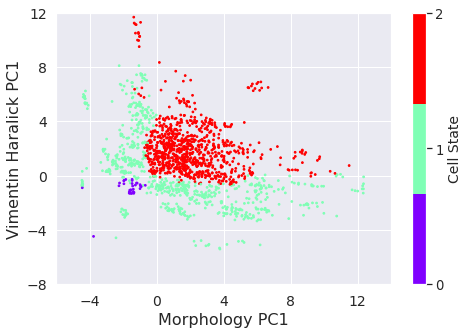

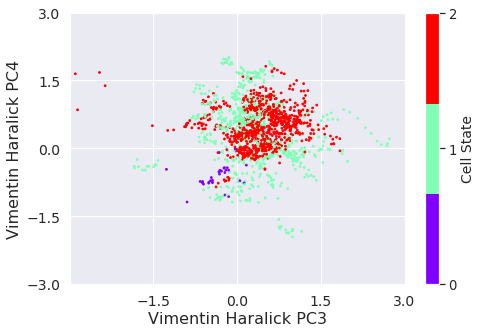

In [107]:
X=M_data
ls2_labels=ls2.predict(X)
ls2_proba=ls2.predict_proba(X)
plt.figure(figsize=(7.5,5))

plt.scatter(X[:, 0], X[:, 1], c=ls2_labels, zorder=10, cmap=cmap,norm=norm,s=3)
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC1',fontsize=16)
cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=14)
plt.axis('tight')
plt.axis([-6,14,-8,12])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'Mlabel_pc1.png',dpi=300)

plt.show()

plt.figure(figsize=(7.5,5))

plt.scatter(X[:, 2], X[:, 3], c=ls2_labels, zorder=10, cmap=cmap,norm=norm,s=3)
plt.xlabel('Vimentin Haralick PC3',fontsize=16)
plt.ylabel('Vimentin Haralick PC4',fontsize=16)

cbar=plt.colorbar(ticks=[0,1,2])
cbar.ax.set_ylabel('Cell State',fontsize=14)
plt.axis('equal')
plt.axis('tight')
plt.axis([-3,3,-3,3])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'Mlabel_pc34.png',dpi=300)

plt.show()

(686, 4)


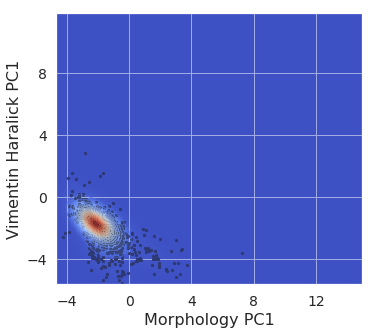

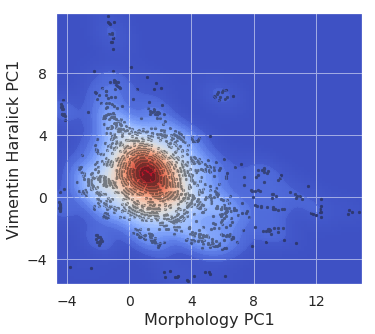

In [108]:
from sklearn.neighbors import KernelDensity
import scipy.stats as st

x_min = X[:, 0].min()-0.2
x_max = X[:, 0].max()+0.2
y_min = X[:, 1].min()-0.2
y_max = X[:, 1].max()+0.2


XX, YY = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

# kd1=KernelDensity(bandwidth=0.1,kernel='gaussian')
# kd1.fit(X[ls2_labels==0][:,:2])
# Z1 = kd1.score_samples(np.c_[XX.ravel(), YY.ravel()])
# Z1 = Z1.reshape(XX.shape)
# kd2=KernelDensity(bandwidth=2,kernel='gaussian')
# kd2.fit(X[ls2_labels==2][:,:2])
# Z2 = kd2.score_samples(np.c_[XX.ravel(), YY.ravel()])
# Z2 = Z2.reshape(XX.shape)

# kd = st.gaussian_kde(np.vstack([X[ls2_labels==2][:,2], X[ls2_labels==2][:,3]]))
# kd = st.gaussian_kde(np.vstack([X[:,0], X[:,1]]))
kd = st.gaussian_kde(np.vstack([P_data[:,0], P_data[:,1]]))
Z = np.reshape(kd(np.vstack([XX.ravel(), YY.ravel()])).T, XX.shape)

print(X[ls2_labels==1].shape)
kd1 = st.gaussian_kde(np.vstack([E_data[:,0], E_data[:,1]]),bw_method=0.7)
Z1 = np.reshape(kd1(np.vstack([XX.ravel(), YY.ravel()])).T, XX.shape)
kd2 = st.gaussian_kde(np.vstack([M_data[:,0], M_data[:,1]]))
Z2 = np.reshape(kd2(np.vstack([XX.ravel(), YY.ravel()])).T, XX.shape)



fig = plt.figure(figsize=(7.5,5))
ax = fig.gca()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.scatter(E_data[:,0],E_data[:,1],s=5,color='k')


cfset = ax.contourf(XX, YY, Z1, 20,alpha=0.5,cmap='coolwarm')
ax.imshow(np.rot90(Z1), cmap='coolwarm', extent=[x_min, x_max, y_min, y_max])
# cset = ax.contour(XX, YY,Z1, colors='k')
# ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Morphology PC1',fontsize=16)
ax.set_ylabel('Vimentin Haralick PC1',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'kde_E.png',dpi=300)

plt.show()

fig = plt.figure(figsize=(7.5,5))
ax = fig.gca()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.scatter(M_data[:,0],M_data[:,1],s=5,color='k')

cfset = ax.contourf(XX, YY, Z2, 20,alpha=0.5,cmap='coolwarm')
ax.imshow(np.rot90(Z2), cmap='coolwarm', extent=[x_min, x_max, y_min, y_max])
# cset = ax.contour(XX, YY,Z1, colors='k')
# ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Morphology PC1',fontsize=16)
ax.set_ylabel('Vimentin Haralick PC1',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(result_path+'kde_M.png',dpi=300)

plt.show()



# fig = plt.figure(figsize=(13, 7))
# ax = fig.gca(projection='3d')

# mask1=np.where((XX>2)|(XX<-7)|(YY>2)|(YY<-7))
# mask2=np.where((XX>8)|(XX<-4)|(YY>8)|(YY<-4))

# Z1[mask1] = np.nan
# Z1[Z2>0.02]=np.nan
# Z2[mask2] = np.nan
# Z=Z1.copy()
# Z[Z2>Z1]=Z2[Z2>Z1]

# surf=ax.plot_surface(XX, YY, -Z, rstride=2, cstride=2, cmap='winter')

# surf1=ax.plot_surface(XX, YY, -Z1,alpha=0.4,rstride=2, cstride=2, cmap='winter', edgecolor='none')
 
# surf2=ax.plot_surface(XX, YY, -Z2, alpha=0.5,rstride=2,cstride=2,cmap='autumn',  edgecolor='none')
# ax.plot_wireframe(XX, YY, -Z,alpha=0.3,color='g')


# surf1=ax.plot_wireframe(XX, YY, -Z1-0.01,alpha=0.3,color='b')
# surf2=ax.plot_wireframe(XX, YY, -Z2,alpha=0.5,color='r')
# ax.contourf(XX, YY, Z, offset=np.amin(-Z-0.01),cmap='coolwarm')


# ax.set_xlabel('Morphology PC1',fontsize=16)
# ax.set_ylabel('Vimentin Haralick PC1',fontsize=16)
# ax.set_zlabel('PDF')
# ax.set_title('Surface plot of Gaussian 2D KDE')
# fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF

# ax.view_init(30, -30)
# plt.show()

In [20]:
sct_list=['/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/single_cell_traj/fluor_sct_xy4_7_long_traj']


for i in range(len(sct_list)):
    with open (sct_list[i], 'rb') as fp:
        sct = pickle.load(fp)
    if hasattr(sct,'traj_scale_cord') and hasattr(sct,'traj_vimentin_scale_haralick_pca_cord'):
        if sct.traj_scale_cord is not None:
            print(sct_list[i])
        
            mask=sct.traj_vimentin_feature_values[0]!=0
               
            traj_t=sct.traj_seri[mask][:,0]
            morph_traj=morph_pc_scaler.transform(sct.traj_scale_cord[mask])
            print(sct.traj_vimentin_scale_haralick_pca_cord[mask].shape)
            vim_traj=vim_pc_scaler.transform(sct.traj_vimentin_scale_haralick_pca_cord[mask])
            
            
            
#             X0=np.column_stack((sct.traj_scale_cord[mask][:,:],sct.traj_vimentin_scale_haralick_pca_cord[mask][:,:]))

            X=np.column_stack((morph_traj[:,0],vim_traj[:,[0,2,3]]))
            X[:,2]=-X[:,2]
            dot_color=np.arange(X.shape[0])/6
            cm=plt.cm.get_cmap('jet')
            plt.figure(figsize=(7.5,5))
            plt.scatter(X[:,0],X[:,1],c=dot_color,cmap=cm)
            plt.xlabel('Morphology PC1',fontsize=16)
            plt.ylabel('Vimentin Haralick PC1',fontsize=16)
            plt.colorbar()
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.savefig(result_path+'fluor_sct_xy4_7_pc1.png',dpi=300)
            plt.show()
            plt.figure(figsize=(7.5,5))
            plt.scatter(X[:,2],X[:,3],c=dot_color,cmap=cm)
            plt.xlabel('Vimentin Haralick PC3',fontsize=16)
            plt.ylabel('Vimentin Haralick PC4',fontsize=16)
            plt.colorbar()
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.savefig(result_path+'fluor_sct_xy4_7_pc34.png',dpi=300)
            plt.show()
            
            
            cmap = plt.cm.rainbow  # define the colormap
            cmaplist = [cmap(i) for i in range(cmap.N)]
            # # force the first color entry to be grey
            # cmaplist[0] = (.5, .5, .5, 1.0)

            # create the new map
            cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

            # define the bins and normalize
            bounds = np.linspace(0, 2, 4)
            norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

            traj_state=ls2.predict(X)
            plt.figure(figsize=(7.5,5))
            plt.scatter(X[:,0],X[:,1],c=traj_state, edgecolor='k',cmap=cmap,norm=norm)
            plt.xlabel('Morphology PC1',fontsize=16)
            plt.ylabel('Vimentin Haralick PC1',fontsize=16)
            plt.axis('tight')
            cbar=plt.colorbar(ticks=[0,1,2])
            cbar.ax.set_ylabel('Cell State',fontsize=14)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.savefig(result_path+'fluor_sct_xy4_7_state_pc1.png',dpi=300)

            plt.show()
            
            plt.figure(figsize=(7.5,5))
            plt.scatter(X[:,2],X[:,3],c=traj_state, edgecolor='k',cmap=cmap,norm=norm)
            plt.xlabel('Vimentin Haralick PC3',fontsize=16)
            plt.ylabel('Vimentin Haralick PC4',fontsize=16)
            plt.axis('tight')
            cbar=plt.colorbar(ticks=[0,1,2])
            cbar.ax.set_ylabel('Cell State',fontsize=14)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.savefig(result_path+'fluor_sct_xy4_7_state_pc34.png',dpi=300)

            plt.show()
            
            
            fig= plt.figure(figsize=(12,8))
            ax = fig.add_subplot(111,projection='3d')
            ax.view_init(azim=235, elev=50)
            s3d=ax.scatter3D(X[:,0],X[:,1],X[:,2],c=traj_state,edgecolor='k',cmap=cmap,norm=norm,s=40)
            
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)

            for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(14)
            ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
            ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
            ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
            ax.set_xlabel('Morphology PC1',fontsize=16,labelpad=15)
            ax.set_ylabel('Vimentin Haralick PC1',fontsize=16,labelpad=15)
            ax.set_zlabel('Vimentin Haralick PC3',fontsize=16,labelpad=15)
            cbar=fig.colorbar(s3d,shrink=0.5,aspect=20,ticks=[0,1,2])
            cbar.ax.set_ylabel('Cell State',fontsize=14)

            plt.savefig(result_path+'traj_state_label.png',dpi=300)


            plt.show()

In [395]:
# # gmm=mixture.BayesianGaussianMixture(n_components=7,covariance_type='full', weight_concentration_prior_type='dirichlet_process').fit(EM_data)

# X=EM_data
# yl=np.concatenate((np.zeros((E_data.shape[0],)),np.ones((M_data.shape[0]))))



# gmm=mixture.GaussianMixture(n_components=2,covariance_type='diag').fit(EM_data)
# gmm_proba=gmm.predict_proba(EM_data)
# plt.hist(gmm_proba)
# plt.show()
# gmm_labels=gmm.predict(EM_data)

# # gmm_labels[(yl==0)&(ori_gmm_labels==0)]=0
# # gmm_labels[(yl==1)&(ori_gmm_labels==1)]=2
# # gmm_labels[yl!=ori_gmm_labels]=1

# plt.scatter(EM_data[:,0],EM_data[:,1],c=gmm_labels,s=1)
# # plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.axis('equal')

# # plt.savefig(result_path+'gmm.png',dpi=300)
# plt.show()

# plt.scatter(EM_data[:,2],EM_data[:,3],c=gmm_labels,s=1)
# # plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
# plt.xlabel('Vimentin haralick PC3',fontsize=16)
# plt.ylabel('Vimentin haralick PC4',fontsize=16)
# plt.axis('equal')
# plt.show()


# ax = plt.axes(projection='3d')
# ax.scatter3D(EM_data[:,1],EM_data[:,2],EM_data[:,0],c=gmm_labels,s=0.1)
# plt.show()

# # with open (main_path+'scale_gmm', 'wb') as fp:
# #     pickle.dump(gmm,fp)



# mask_i=(X[:,0]<-1)&(X[:,1]<-1)&(X[:,2]>0)&(X[:,3]<0)
# mask_f=(X[:,0]>-0.4)&(X[:,1]>-0.4)&(X[:,2]<0)&(X[:,3]>0)

# yl[mask_i]=0
# yl[mask_f]=2
# yl[~(mask_i|mask_f)]=1
# X=EM_data
# ls2=LabelSpreading(kernel='knn',n_neighbors=60,alpha=0.9)
# print(X.shape)
# ls2.fit(X,yl)


# ls2_labels=ls2.predict(X)
# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=ls2_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.axis('tight')
# plt.show()



# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=yl, zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.axis('tight')
# plt.show()
#

In [394]:
#  kernel = 1.0 * RBF([1.0, 1.0,1.0,1.0])
# gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(EM_data, yl)

# gpc_proba=gpc.predict_proba(EM_data)
# gpc_labels=gpc.predict(EM_data)

# # mask=gpc_proba[:,1]>0.99
# # gpc_labels[mask]=1
# # gpc_labels[~mask]=0
# # gpc_labels[(gpc_proba[:,0]-gpc_proba[:,1])<-0.55]=2
# # gpc_labels[(gpc_proba[:,0]-gpc_proba[:,1])>0.9]=0
# # gpc_labels[((gpc_proba[:,0]-gpc_proba[:,1])>=-0.5)&((gpc_proba[:,0]-gpc_proba[:,1])<0.9)]=1

# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=gpc_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.axis('tight')
# plt.show()


# plt.hist(gpc_proba[:,0]-gpc_proba[:,1],bins=20)
# plt.show()


# knnc=RadiusNeighborsClassifier(radius=5,p=1,weights='distance').fit(EM_data,gmm_labels)
# # knnc_proba=knnc.predict_proba(EM_data)
# knnc_labels=knnc.predict(EM_data)

# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=knnc_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.axis('tight')
# plt.show()


# plt.hist(knnc_proba,bins=20)
# plt.show()

In [173]:
# from sklearn.neighbors import KernelDensity
# X=EM_data
# kde_score_range=np.zeros((2,2))
# kd1=KernelDensity(bandwidth=2,kernel='gaussian')
# kd1.fit(E_data)
# x_min = X[:, 0].min()
# x_max = X[:, 0].max()
# y_min = X[:, 1].min()
# y_max = X[:, 1].max()


# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# Z1 = kd1.score_samples(np.c_[XX.ravel(), YY.ravel()])

# kde_score_range[0,0],kde_score_range[0,1]=np.amin(Z1),np.amax(Z1)

# Z1=(Z1-np.amin(Z1))/(np.amax(Z1)-np.amin(Z1))
# print(Z1.shape)
# plt.hist(Z1)
# plt.show()
# # Z1[Z1<0.75]=0.75
# # Put the result into a color plot
# Z1 = Z1.reshape(XX.shape)
# # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
# plt.scatter(E_data[:, 0], E_data[:, 1], c='b', zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.contour(XX, YY, Z1, 200)
# plt.contourf(XX, YY, Z1,200,cmap=plt.cm.get_cmap('jet'))
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.axis('tight')
# plt.colorbar()
# # plt.savefig(result_path+'kde_E.tif',dpi=300)
# plt.show()


# kd2=KernelDensity(bandwidth=3,kernel='gaussian')
# kd2.fit(M_data)
# Z2 = kd2.score_samples(np.c_[XX.ravel(), YY.ravel()])
# kde_score_range[1,0],kde_score_range[1,1]=np.amin(Z2),np.amax(Z2)

# Z2=(Z2-np.amin(Z2))/(np.amax(Z2)-np.amin(Z2))
# plt.hist(Z2)
# plt.show()
# # Z2[Z2<0.75]=0
# # Put the result into a color plot
# Z2 = Z2.reshape(XX.shape)
# # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
# plt.scatter(M_data[:, 0], M_data[:, 1], c='b', zorder=10,cmap=plt.cm.Paired, s=0.5)
# plt.contour(XX, YY, Z2, 200)
# plt.contourf(XX, YY, Z2,200,cmap=plt.cm.get_cmap('jet'))
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.axis('tight')
# plt.colorbar()
# # plt.savefig(result_path+'kde_M.tif',dpi=300)
# plt.show()


# plt.scatter(E_data[:, 0], E_data[:, 1], c='b',zorder=10,cmap=plt.cm.Paired, s=0.5)
# plt.scatter(M_data[:, 0], M_data[:, 1], c='r',zorder=10,cmap=plt.cm.Paired, s=0.5)
# plt.contour(XX, YY, Z1-Z2, 30)
# plt.contourf(XX, YY, Z1-Z2,30,cmap=plt.cm.get_cmap('jet'))

# # plt.axis([-6,8,-6,8])
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.colorbar()
# # plt.savefig(result_path+'kde_E-M.tif',dpi=300)
# plt.show()

# # with open (main_path+'kde_E', 'wb') as fp:
# #     pickle.dump(kd1,fp)
# # with open (main_path+'kde_M', 'wb') as fp:
# #     pickle.dump(kd2,fp)

# print(kde_score_range)
# # np.save(main_path+'kde_score_range.npy',kde_score_range)

In [393]:
# all_t=np.concatenate(all_t0,axis=0)




# mask1=all_t<24
# E_data=np.column_stack((Y1[mask1][:,0],Y2[mask1][:,[0,2,3]]))
# print(np.std(E_data,axis=0))

# mask2=(all_t>271)&(all_t<307)
# P_data=np.column_stack((Y1[mask2][:,0],Y2[mask2][:,[0,2,3]]))
# print(np.std(P_data,axis=0))
# mask3=all_t>552
# # mask4=Y1[:,0]>-3
# M_data=np.column_stack((Y1[mask3][:,0],Y2[mask3][:,[0,2,3]]))
# print(np.std(M_data,axis=0))
# print(E_data.shape[0]*1.0/M_data.shape[0])

# EM_data=np.vstack((E_data,M_data))
# EPM_data=np.vstack((EM_data,P_data))
# X=EM_data
# yl=np.concatenate((np.zeros((E_data.shape[0],)),np.ones((M_data.shape[0]))))
# yl[(X[:,0]<-1)&(X[:,1]<-1)]=0
# yl[(X[:,0]>0.1)&(X[:,1]>-0.1)]=2
# yl[(X[:,0]>-1)&(X[:,1]<0)]=1
# yl[(X[:,0]<-1)&(X[:,1]>0)]=2

# kde_score_range=np.zeros((2,2))
# kd1=KernelDensity(bandwidth=2,kernel='gaussian')
# kd1.fit(E_data)
# x1_min = X[:, 0].min()
# x1_max = X[:, 0].max()
# x2_min = X[:, 1].min()
# x2_max = X[:, 1].max()
# x3_min = X[:, 2].min()
# x3_max = X[:, 2].max()
# x4_min = X[:, 3].min()
# x4_max = X[:, 3].max()
# xx1 = np.linspace(x1_min, x1_max, 10)
# xx2 = np.linspace(x2_min, x2_max, 10)
# xx3 = np.linspace(x3_min, x3_max, 10)
# xx4 = np.linspace(x4_min, x4_max, 10)

# XX1,XX2,XX3,XX4 = np.meshgrid(xx1,xx2,xx3,xx4)
# Z1 = kd1.score_samples(np.c_[XX1.ravel(), XX2.ravel(),XX3.ravel(),XX4.ravel()])
# print(XX1.shape,Z1.shape)
# kde_score_range[0,0],kde_score_range[0,1]=np.amin(Z1),np.amax(Z1)

# Z1=(Z1-np.amin(Z1))/(np.amax(Z1)-np.amin(Z1))
# print(Z1.shape)
# plt.hist(Z1)
# plt.show()
# # Z1[Z1<0.75]=0.75
# # Put the result into a color plot
# Z1 = Z1.reshape((100,10,10))
# # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
# plt.scatter(E_data[:, 2], E_data[:, 3], c='b', zorder=10,cmap=plt.cm.Paired, s=0.5)

# z2d=np.sum(Z1,axis=0)
# plt.contour(XX3[0,0,:,:], XX4[0,0,:,:], z2d,20)
# plt.contourf(XX3[0,0,:,:], XX4[0,0,:,:],z2d,20,cmap=plt.cm.get_cmap('jet'))
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.axis('tight')
# plt.colorbar()
# # plt.savefig(result_path+'kde_E.tif',dpi=300)
# plt.show()

In [311]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=2, kernel='epanechnikov'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0]*1.0 / X.shape[0])
                           for Xi in training_sets]
        print(self.logpriors_)

        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T

        result = np.exp(logprobs + self.logpriors_)

        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [396]:
# kd0=KDEClassifier().fit(X,yl)


# kd_proba=kd0.predict_proba(X)
# plt.hist(kd_proba)
# plt.show()

# kd_labels=kd0.predict(X)

# # kd_labels[kd_proba>0.7]=2
# # kd_labels[kd_proba<-0.7]=0
# # kd_labels[(kd_proba>-0.7)&(kd_proba<0.7)]=1
# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=kd_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)
# plt.show()


# ls2=LabelSpreading(kernel='knn',n_neighbors=10,alpha=0.9)

# ls2.fit(X,kd_labels)

# plt.figure()

# x_min = X[:, 0].min()
# x_max = X[:, 0].max()
# y_min = X[:, 1].min()
# y_max = X[:, 1].max()


# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# Z = ls2.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,1]
# Z = Z.reshape(XX.shape)

# # print(Z.shape)
# ls2_labels=ls2.predict_proba(X)
# plt.hist(ls2_labels)
# plt.show()
# ls2_labels=ls2.predict(X)
# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=ls2_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)
# # plt.contourf(XX, YY, Z,  20,cmap=plt.cm.get_cmap('Greys'))
# # plt.contour(XX, YY, Z, 20)

# plt.colorbar()
# # plt.savefig(result_path+'label_spreading_P.tif',dpi=300)
# plt.axis('tight')
# plt.show()

In [34]:
# from sklearn import datasets, svm
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.semi_supervised import LabelSpreading

# print(X.shape,gmm_labels.shape)

# # clf = svm.SVC(kernel='rbf',gamma=20, probability=True)
# # clf=KNeighborsClassifier(n_neighbors=5,leaf_size=100)


# ls=LabelSpreading(kernel='knn',n_neighbors=40,alpha=0.99)

# ls.fit(X, gmm_labels)

# plt.figure()

# # plt.axis('tight')
# x_min = X[:, 0].min()
# x_max = X[:, 0].max()
# y_min = X[:, 1].min()
# y_max = X[:, 1].max()

# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
# print(Z.shape)
# plt.hist(Z)
# plt.show()
# # Put the result into a color plot
# Z = Z.reshape(XX.shape)

# ls_prob=ls.predict_proba(X)
# ls_labels=ls.predict(X)
# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=ls_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)

# plt.contourf(XX, YY, Z,  50,cmap=plt.cm.get_cmap('jet'))
# plt.contour(XX, YY, Z, 50)
# plt.colorbar()
# plt.axis('tight')
# plt.show()

In [392]:

# X=EM_data

# kd1_score=(kd1.score_samples(X)-kde_score_range[0,0])/(kde_score_range[0,1]-kde_score_range[0,0])
# kd2_score=(kd2.score_samples(X)-kde_score_range[1,0])/(kde_score_range[1,1]-kde_score_range[1,0])

# # kd1_score=(kd1.score_samples(X)-np.amin(kd1.score_samples(X)))/(np.amax(kd1.score_samples(X))-np.amin(kd1.score_samples(X)))
# # kd2_score=(kd2.score_samples(X)-np.amin(kd2.score_samples(X)))/(np.amax(kd2.score_samples(X))-np.amin(kd2.score_samples(X)))

# plt.hist(kd1_score)
# plt.show()

# kde_labels=-1*np.ones(X.shape[0])
# kde_labels[(kd1_score-kd2_score)>0.08]=0
# kde_labels[(kd1_score-kd2_score)<-0.04]=2
# # kde_labels[kd1_score>0.96]=0
# # kde_labels[kd2_score>0.95]=2
# mask=(kde_labels!=-1)
# kde_labels[~mask]=1

# plt.hist(kde_labels)
# plt.show()
# # clf2=LabelPropagation(kernel='knn',n_neighbors=10)
# ls2=LabelSpreading(kernel='knn',n_neighbors=10,alpha=0.9)
# print(X[mask].shape)
# ls2.fit(X,kde_labels)

# plt.figure()

# Z = ls2.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,1]
# Z = Z.reshape(XX.shape)

# print(Z.shape)
# ls2_labels=ls2.predict_proba(X)
# plt.hist(ls2_labels)
# plt.show()
# ls2_labels=ls2.predict(X)
# plt.scatter(EM_data[:, 0], EM_data[:, 1], c=ls2_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)
# plt.contourf(XX, YY, Z,  20,cmap=plt.cm.get_cmap('jet'))
# # plt.contour(XX, YY, Z, 20)

# plt.colorbar()
# # plt.savefig(result_path+'label_spreading_P.tif',dpi=300)
# plt.axis('tight')
# plt.show()

# # plt.scatter(EM_data[:, 0], EM_data[:, 1], c=ls2_labels, zorder=10,cmap=plt.cm.Paired, s=0.5)
# # plt.show()

# # with open (main_path+'label_spread', 'wb') as fp:
# #     pickle.dump(ls2,fp)

In [77]:
#--------test clustering method
# from sklearn.cluster import DBSCAN

# clustering = DBSCAN(eps=1.2, min_samples=30).fit(M_data)
# plt.scatter(M_data[:,0],M_data[:,1],c=clustering.labels_,s=1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()

# from sklearn.cluster import Birch

# brc = Birch(branching_factor=20, n_clusters=2, threshold=2,compute_labels=True)
# brc.fit(EM_data) 
# plt.scatter(EM_data[:,0],EM_data[:,1],c=brc.labels_,s=1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()


# from sklearn.cluster import AffinityPropagation

# clustering = AffinityPropagation().fit(EM_data)
# plt.scatter(EM_data[:,0],EM_data[:,1],c=clustering.labels_,s=1)
# plt.xlabel('Morphology PC1',fontsize=16)
# plt.ylabel('Vimentin haralick PC1',fontsize=16)
# plt.show()

# X, Y = np.meshgrid(np.linspace(-6, 8,500), np.linspace(-8,8,500))
# XX = np.array([X.ravel(), Y.ravel()]).T
# Z = gmm.score_samples(XX)
# Z = Z.reshape((500,500))
 
# plt.contour(X, Y, Z)
# # plt.scatter(X_train[:, 0], X_train[:, 1])
 
# plt.show()

In [87]:
all_t=np.concatenate(all_t0,axis=0)

mask1=all_t<=24
E_morph=sY1[mask1]
E_vim=sY2[mask1][:,:4]


mask2=(all_t>271)&(all_t<307)
P_morph=sY1[mask2]
P_vim=sY2[mask2]

mask3=all_t>552
M_morph=sY1[mask3]
M_vim=sY2[mask3]

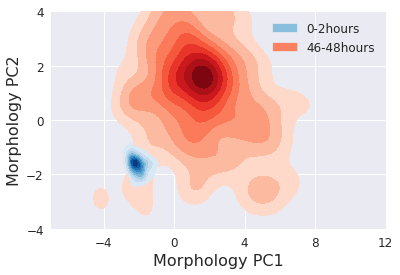

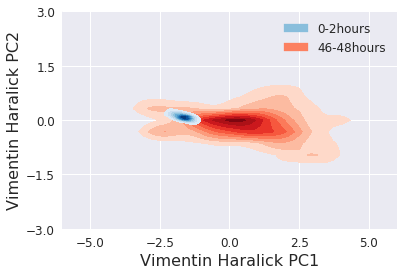

In [88]:
# E_morph_df=pd.DataFrame(E_morph, columns=['Morphology_PC1','Morphology_PC2'])
# g = sns.jointplot('Morphology_PC1','Morphology_PC2',data=E_morph_df,kind="kde", xlim=(-5,10),ylim=(-4,4), space=0, color="g")
# plt.title('0-2hours',fontsize=16)
# plt.show()

# M_morph_df=pd.DataFrame(M_morph, columns=['Morphology_PC1','Morphology_PC2'])
# g = sns.jointplot('Morphology_PC1','Morphology_PC2',data=M_morph_df,kind="kde",xlim=(-5,10),ylim=(-4,4),  space=0, color="g")
# plt.title('46-48hours',fontsize=16)
# plt.show()


label_patch2=mpatches.Patch(color=sns.color_palette('Reds')[2],label='46-48hours')
label_patch1=mpatches.Patch(color=sns.color_palette('Blues')[2],label='0-2hours')
label_patches=[label_patch1,label_patch2]

ax = sns.kdeplot(M_morph[:,0],M_vim[:,0],cmap="Reds",n_levels=10, shade=True, shade_lowest=False)
ax = sns.kdeplot(E_morph[:,0],E_vim[:,0],cmap="Blues", n_levels=10, shade=True, shade_lowest=False)
plt.legend(handles=label_patches, loc='upper right')
plt.xlabel('Morphology PC1',fontsize=16)
plt.ylabel('Morphology PC2',fontsize=16)
plt.axis([-7,12,-4,4],'equal')
# plt.savefig(result_path+'morph_start_end_kde.tif',dpi=300)
plt.show()

ax = sns.kdeplot(M_vim[:,0],M_vim[:,1],cmap="Reds",n_levels=10, shade=True, shade_lowest=False)
ax = sns.kdeplot(E_vim[:,0],E_vim[:,1],cmap="Blues", n_levels=10, shade=True, shade_lowest=False)
plt.legend(handles=label_patches, loc='upper right')
plt.xlabel('Vimentin Haralick PC1',fontsize=16)
plt.ylabel('Vimentin Haralick PC2',fontsize=16)
plt.axis([-6,6,-3,3],'equal')
# plt.savefig(result_path+'vim_start_end_kde.tif',dpi=300)
plt.show()

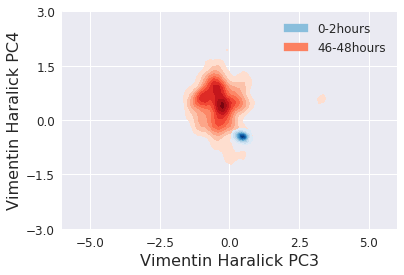

In [90]:
ax = sns.kdeplot(M_vim[:,2],M_vim[:,3],cmap="Reds",n_levels=10, shade=True, shade_lowest=False)
ax = sns.kdeplot(E_vim[:,2],E_vim[:,3],cmap="Blues", n_levels=10, shade=True, shade_lowest=False)
plt.legend(handles=label_patches, loc='upper right')
plt.xlabel('Vimentin Haralick PC3',fontsize=16)
plt.ylabel('Vimentin Haralick PC4',fontsize=16)
plt.axis([-6,6,-3,3],'equal')
plt.show()

In [91]:
s_Y=np.column_stack((sY1[:,0],sY2[:,[0,2,3]]))

mask0=(all_t<=24)
h0=s_Y[mask0]
h0_proba=ls2.predict_proba(h0)[:,2]

h0_labels=ls2.predict(h0)
# h0_proba_df=pd.DataFrame(h0_proba, columns=['Epithelial_state','Mesenchymal_state'])
# g = sns.jointplot('Epithelial_state','Mesenchymal_state',data=h0_proba_df,kind="kde",space=0, color="g")

# plt.title('0-2hour')
# plt.show()

mask12=(all_t>133)&(all_t<157)
h12=s_Y[mask12]
h12_proba=ls2.predict_proba(h12)[:,2]
h12_labels=ls2.predict(h12)


mask24=(all_t>277)&(all_t<301)
h24=s_Y[mask24]
h24_proba=ls2.predict_proba(h24)[:,2]
h24_labels=ls2.predict(h24)

mask30=(all_t>348)&(all_t<372)
h30=s_Y[mask30]
h30_proba=ls2.predict_proba(h30)[:,2]
h24_labels=ls2.predict(h24)

mask36=(all_t>421)&(all_t<445)
h36=s_Y[mask36]
h36_proba=ls2.predict_proba(h36)[:,2]
h36_labels=ls2.predict(h36)



mask42=(all_t>492)&(all_t<516)
h42=s_Y[mask42]
h42_proba=ls2.predict_proba(h42)[:,2]
h42_labels=ls2.predict(h42)


mask44=(all_t>516)&(all_t<540)
h44=s_Y[mask44]
h44_proba=ls2.predict_proba(h44)[:,2]
h44_labels=ls2.predict(h44)

mask5=all_t>552
h48=s_Y[mask5]
h48_proba=ls2.predict_proba(h48)[:,2]
h48_labels=ls2.predict(h48)




# plt.figure(figsize=(10,6))

# # cmaps = ['Reds', 'Blues', 'Greens', 'Greys']
# # sns.kdeplot(h0_proba,label='0-2 hour')
# # sns.kdeplot(h12_proba,label='11-13 hour')
# sns.kdeplot(h24_proba,label='23-25 hour')
# sns.kdeplot(h30_proba,label='29-31 hour')
# sns.kdeplot(h36_proba,label='35-37 hour')
# sns.kdeplot(h42_proba,label='41-43 hour')
# sns.kdeplot(h44_proba,label='43-45 hour')

# sns.kdeplot(h48_proba,label='46-48 hour')

# plt.xlabel('Predicted Probability of Mesenchymal State \n by Label Propagation Function',fontsize=16)
# plt.ylabel('Probability Density by KDE',fontsize=16)
# plt.legend()
# # plt.savefig(result_path+'ls_proba_M_state.tif',dpi=300)
# plt.show()

/home/zoro/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/zoro/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/zoro/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/zoro/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/zoro/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarnin

{'E_state': [1474, 471, 111, 90, 74, 49], 'M_state': [0, 82, 789, 984, 1013, 954], 'I_state': [423, 1621, 1210, 743, 642, 630]}
[0.7770163415919874, 0.21665133394664213, 0.05260663507109005, 0.04953219592735278, 0.042799305957200696, 0.030006123698714023]


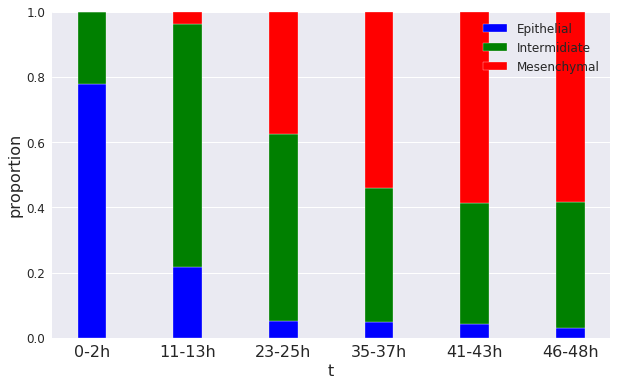

In [92]:
r = [0,1,2,3,4,5]
raw_data = {'E_state': [h0_labels[h0_labels==0].shape[0], h12_labels[h12_labels==0].shape[0],h24_labels[h24_labels==0].shape[0],\
                        h36_labels[h36_labels==0].shape[0], h42_labels[h42_labels==0].shape[0],h48_labels[h48_labels==0].shape[0]], \
            'I_state': [h0_labels[h0_labels==1].shape[0], h12_labels[h12_labels==1].shape[0],h24_labels[h24_labels==1].shape[0],\
                        h36_labels[h36_labels==1].shape[0],h42_labels[h42_labels==1].shape[0],h48_labels[h48_labels==1].shape[0]],\
            'M_state': [h0_labels[h0_labels==2].shape[0],h12_labels[h12_labels==2].shape[0],h24_labels[h24_labels==2].shape[0],\
                        h36_labels[h36_labels==2].shape[0],h42_labels[h42_labels==2].shape[0],h48_labels[h48_labels==2].shape[0]]}
df = pd.DataFrame(raw_data)
print(raw_data)
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['E_state'], df['I_state'], df['M_state'])]
E_state = [i *1.0/ j  for i,j in zip(df['E_state'], totals)]
I_state = [i*1.0 / j  for i,j in zip(df['I_state'], totals)]
M_state = [i *1.0/ j  for i,j in zip(df['M_state'], totals)]
print(E_state)
# plot

plt.figure(figsize=(10,6))
barWidth = 0.3
names = ('0-2h','11-13h','23-25h','35-37h','41-43h','46-48h')
# Create green Bars
plt.bar(r, E_state, color='b', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, I_state, bottom=E_state, color='g', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, M_state, bottom=[i+j for i,j in zip(E_state, I_state)], color='r', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names,fontsize=16)
plt.xlabel('t',fontsize=16)
plt.ylabel('proportion',fontsize=16)
# Show graphic
plt.legend(['Epithelial','Intermidiate','Mesenchymal'],fontsize=12)
plt.show()

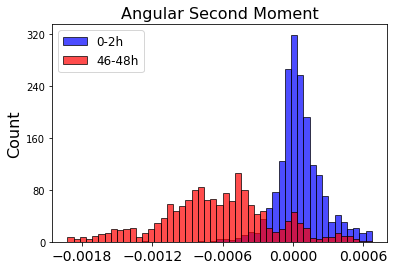

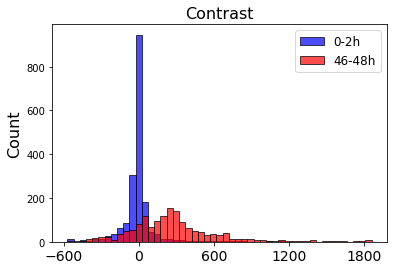

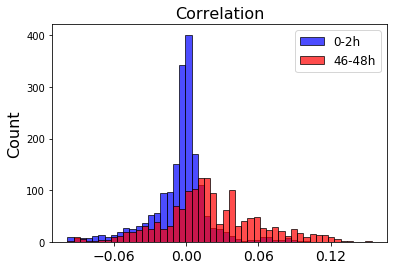

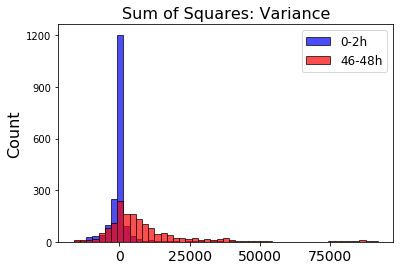

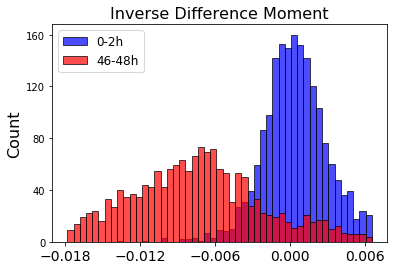

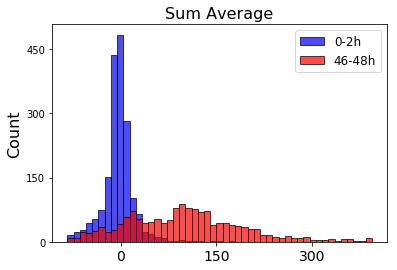

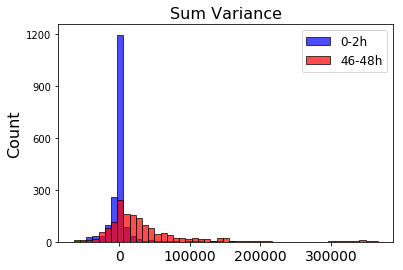

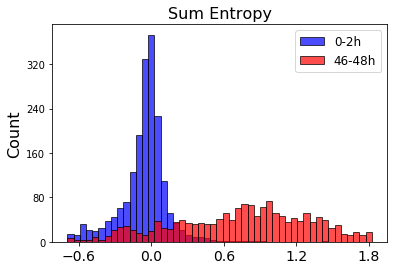

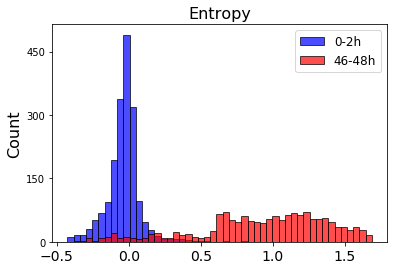

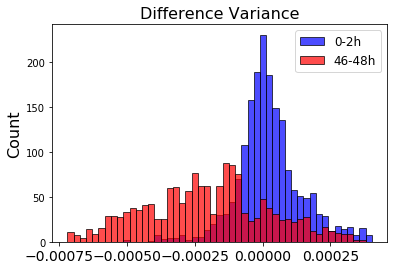

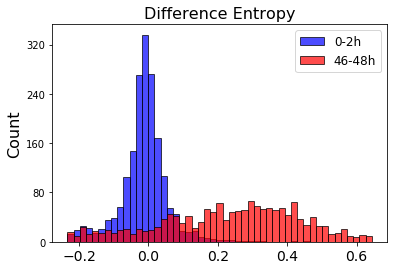

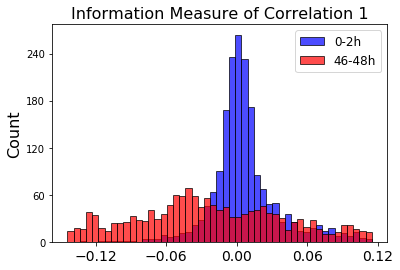

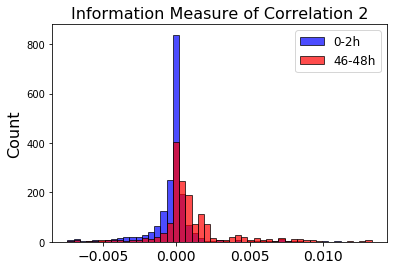

In [9]:
haralick_labels = ["Angular Second Moment",
               "Contrast",
               "Correlation",
               "Sum of Squares: Variance",
               "Inverse Difference Moment",
               "Sum Average",
               "Sum Variance",
               "Sum Entropy",
               "Entropy",
               "Difference Variance",
               "Difference Entropy",
               "Information Measure of Correlation 1",
               "Information Measure of Correlation 2"]

all_t=np.concatenate(all_t0,axis=0)
all_haralick=np.vstack(all_haralick0)
mask1=all_t<=24
E_hara=all_haralick[mask1]

# mask2=(all_t>271)&(all_t<307)
# P_hara=all_haralick[mask2]
# print(np.std(P_data,axis=0))

mask3=all_t>552
M_hara=all_haralick[mask3]

for j in range(all_haralick.shape[1]):
    bins=np.linspace(np.quantile(np.vstack((E_hara,M_hara))[:,j],0.02),np.quantile(np.vstack((E_hara,M_hara))[:,j],0.98),50)
    
    
    plt.hist(E_hara[:,j], bins=bins,alpha=0.7, label='0-2h',edgecolor='k',color='blue')
    plt.hist(M_hara[:,j], bins=bins,alpha=0.7, label='46-48h',edgecolor='k',color='red')
    plt.legend(fontsize=12)
#     plt.title(haralick_labels[j])
    plt.title(haralick_labels[j],fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.xticks(fontsize=14)
    plt.xticks(fontsize=14)

#     plt.savefig(result_path+'/Haralick distribution/'+haralick_labels[j]+'.tif', dpi=300)
    plt.savefig(result_path+'/Haralick distribution/'+haralick_labels[j]+'.png',dpi=300)

    plt.show()

In [3]:
# #----------------mean trajectory calculation--------------------------------

# mean_traj_contour=np.zeros((577,300))
# mean_count=np.zeros((577,))
# mean_vim=np.zeros((577))
# mean_haralick=np.zeros((577,13))
# for i in range(len(sct_list)):
#     with open (sct_list[i], 'rb') as fp:
#         sct = pickle.load(fp)
#     for j in range(len(sct.traj_contour)):
#         img_num=(sct.traj_seri[j,0]).astype(np.int)

#         mean_traj_contour[img_num-1,:]+=sct.traj_contour[j,:]

#         mean_vim[img_num-1]+=sct.traj_vimentin_feature_values[0][j]
#         mean_haralick[img_num-1,:]+=sct.traj_vimentin_feature_values[3][j,:]

#         mean_count[img_num-1]+=1

# mean_traj_contour=mean_traj_contour/mean_count[:,None]
# mean_vim=mean_vim/mean_count
# mean_haralick=mean_haralick/mean_count[:,None]

# mask=mean_vim!=0
# print(mask.shape)

# for k in range(577):
#     plt.plot(mean_traj_contour[k,::2],mean_traj_contour[k,1::2],'.')
# plt.show()   
   
# dot_color=np.arange(mean_vim[mask].shape[0])
# cm=plt.cm.get_cmap('jet')

# for j in range(mean_haralick.shape[1]):
#     print(j)
#     sc=plt.scatter(np.arange(mean_haralick[mask].shape[0]),mean_haralick[mask][:,j]/mean_vim[mask],s=5,c=dot_color,cmap=cm)
#     plt.xlabel('PC1',fontsize=16)
#     plt.ylabel('PC2',fontsize=16)
#     #     plt.axis([-450,800,-400,400])
#     plt.colorbar(sc)
#     plt.show()
    
#     plt.scatter(np.arange(mean_haralick[mask].shape[0]),mean_haralick[mask][:,j],s=5,c=dot_color,cmap=cm)
#     plt.show()

In [10]:
# scale_features=[]
# scale_contours=[]
# scale_haralick=[]
# for i in range(len(sct_list)):
#     with open (sct_list[i], 'rb') as fp:
#         sct = pickle.load(fp)
    
#     mask=sct.traj_vimentin_feature_values[0]!=0
# #     scale_contours.append(sct.traj_contour[mask]/np.sqrt(sct.traj_feature[mask][0,0]))
#     scale_contours.append(sct.traj_contour[mask])
#     scale_features.append(sct.traj_feature[mask][:,key_mask])
#     traj_norm_haralick=sct.traj_vimentin_feature_values[2][mask]
#     scale_haralick.append(traj_norm_haralick)
# #     for j in range(traj_norm_haralick.shape[1]):
# #         plt.plot((traj_norm_haralick)[:,j])
# #         plt.show()

In [11]:
# scaler1 = StandardScaler()
# X1=np.vstack(scale_features)
# print(X1.shape)
# X1=scaler1.fit_transform(X1)
# pca1 = decomposition.PCA(n_components =0.98,svd_solver= 'full')
# Y1 = pca1.fit_transform(X1)
# print(pca1.explained_variance_ratio_)


# X2=np.vstack(scale_haralick)
# scaler2 = StandardScaler()

# X2=scaler2.fit_transform(X2)
# print(X2.shape)


# pca2 = decomposition.PCA(n_components =0.98,svd_solver= 'full')
# Y2 = pca2.fit_transform(X2)
# print(pca2.components_,pca2.explained_variance_ratio_)


# X=np.column_stack((X1,X2))
# pca = decomposition.PCA(n_components =0.98,svd_solver= 'full')
# Y = pca.fit_transform(X)
# print(pca.components_,pca.explained_variance_ratio_)

In [12]:
# plt.scatter(Y1[:,0],Y2[:,0],s=0.01)
# plt.show()
# sns.kdeplot(Y1[:,0],Y2[:,0],n_levels=50,shade=True)
# # # plt.axis([-2.5,2.5,-2.5,2.5])
# plt.show()


# plt.scatter(Y[:,0],Y[:,1],s=0.01)
# plt.show()
# sns.kdeplot(Y[:,0],Y[:,1],n_levels=50,shade=True)
# # # plt.axis([-2.5,2.5,-2.5,2.5])
# plt.show()

# ax = plt.axes(projection='3d')
# ax.scatter3D(Y[:,0],Y[:,1],Y[:,2],s=0.01)
# # #     ax.view_init(50, 25)
# plt.show()

In [13]:
# for i in range(len(sct_list)):
#     with open (sct_list[i], 'rb') as fp:
#         sct = pickle.load(fp)
    
#     mask=sct.traj_vimentin_feature_values[0]!=0
# #     scale_contour=sct.traj_contour[mask]
# #     scale_cord=pca1.transform(scale_contour)

#     traj_feature=sct.traj_feature[mask][:,key_mask]
#     scale_feature=scaler1.transform(traj_feature)
    
#     traj_norm_haralick=sct.traj_vimentin_feature_values[3][mask]
#     scale_haralick=scaler2.transform(traj_norm_haralick)
#     scale_haralick_cord=pca2.transform(scale_haralick)
    
#     scale_cord=pca.transform(np.column_stack((scale_feature,scale_haralick)))

#     dot_color=np.arange(scale_cord.shape[0])
#     cm=plt.cm.get_cmap('jet')
#     plt.scatter(scale_cord[:,0],scale_cord[:,1],s=5,c=dot_color,cmap=cm)
#     plt.show()
    
#     ax = plt.axes(projection='3d')
#     ax.scatter3D(scale_cord[:,0],scale_cord[:,1],s=5,c=dot_color,cmap=cm)
#     # #     ax.view_init(50, 25)
#     plt.show()

    
# #     plt.scatter(scale_cord[:,0],scale_cord[:,1],s=5,c=dot_color,cmap=cm)
# #     plt.show()
    
# #     plt.scatter(scale_haralick_cord[:,0],scale_haralick_cord[:,1],s=5,c=dot_color,cmap=cm)
# #     plt.show()